# 1. Perkenalan

=================================================

Milestone 2

Nama  : Jyotis Sugata

Batch : HCK-31

Prediksi Uber Drive Booking Cancel

=================================================

## URL Dataset
https://www.kaggle.com/datasets/yashdevladdha/uber-ride-analytics-dashboard/data

## Problem
Tingkat pembatalan perjalanan (booking cancellation) menjadi masalah utama pada layanan ride-hailing. Pembatalan menyebabkan hilangnya potensi pendapatan, menurunkan kepuasan pelanggan, serta menambah beban operasional. 

## Latar Belakang
Dalam dataset, terdapat banyak kasus pembatalan baik oleh customer maupun driver, dengan alasan yang beragam (misalnya lokasi sulit dijangkau, waktu tunggu terlalu lama, perubahan rencana customer). Dengan memanfaatkan data historis booking, perusahaan bisa membangun model untuk memprediksi kemungkinan pembatalan.
Jika prediksi ini akurat, sistem dapat:
- Memberikan peringatan dini ke driver/customer.
- Menawarkan solusi preventif (misalnya armada alternatif, voucher diskon, atau prioritas driver).
- Mengurangi kerugian finansial sekaligus meningkatkan pengalaman pelanggan.

## Problem Statement
Tingkat pembatalan perjalanan pada layanan ride-hailing masih cukup tinggi, yang berdampak pada hilangnya pendapatan, meningkatnya waktu tunggu pelanggan, serta menurunnya kepuasan pengguna. Berdasarkan data historis booking, diperlukan sebuah sistem prediksi yang mampu mengidentifikasi kemungkinan pembatalan, dengan harapan tingkat pembatalan booking ditargetkan turun dari 25% menjadi maksimal 20% setelah implementasi rekomendasi berbasis prediksi.

Melalui langkah-langkah eksplorasi data, feature engineering, dan pengembangan model klasifikasi, sistem ini diharapkan dapat memberikan peringatan dini terhadap risiko pembatalan. Dengan demikian, kualitas layanan dapat meningkat, efisiensi operasional lebih baik, dan kepuasan pelanggan terjaga. Semua ini diharapkan dapat tercapai dalam waktu 1 tahun

## Target Audience
- Manajemen operasional → untuk strategi penempatan driver dan promosi.
- Tim product & data → untuk implementasi model prediksi dalam aplikasi.
- Driver → untuk mendapatkan order yang lebih stabil dan minim risiko cancel

# 2. Import Libraries

install category-encoders untuk membantu melakukan encoding kategori

In [125]:
# Library for dataframe and manipulation
import pandas as pd
import numpy as np

# Library for Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Libaries related to feature engineering
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from scipy.stats import spearmanr, pearsonr, chi2_contingency
from sklearn.pipeline import Pipeline, make_pipeline

# Model
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# Model Evaluation and Parameter Tuning
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV
from sklearn.metrics import recall_score, precision_score, roc_auc_score

# model saving
import pickle

# 3. Data Loading

In [176]:
df = pd.read_csv('deployment\src\P1M2_jyotis-sugata_dataset.csv')
df.head(10)

,Date,Time,Booking ID,Booking Status,Customer ID,Vehicle Type,Pickup Location,Drop Location,Avg VTAT,Avg CTAT,...,Reason for cancelling by Customer,Cancelled Rides by Driver,Driver Cancellation Reason,Incomplete Rides,Incomplete Rides Reason,Booking Value,Ride Distance,Driver Ratings,Customer Rating,Payment Method
0,2024-03-23,12:29:38,"""CNR5884300""",No Driver Found,"""CID1982111""",eBike,Palam Vihar,Jhilmil,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2024-11-29,18:01:39,"""CNR1326809""",Incomplete,"""CID4604802""",Go Sedan,Shastri Nagar,Gurgaon Sector 56,4.9,14.0,...,NaN,NaN,NaN,1.0,Vehicle Breakdown,237.0,5.73,NaN,NaN,UPI
2,2024-08-23,08:56:10,"""CNR8494506""",Completed,"""CID9202816""",Auto,Khandsa,Malviya Nagar,13.4,25.8,...,NaN,NaN,NaN,NaN,NaN,627.0,13.58,4.9,4.9,Debit Card
3,2024-10-21,17:17:25,"""CNR8906825""",Completed,"""CID2610914""",Premier Sedan,Central Secretariat,Inderlok,13.1,28.5,...,NaN,NaN,NaN,NaN,NaN,416.0,34.02,4.6,5.0,UPI
4,2024-09-16,22:08:00,"""CNR1950162""",Completed,"""CID9933542""",Bike,Ghitorni Village,Khan Market,5.3,19.6,...,NaN,NaN,NaN,NaN,NaN,737.0,48.21,4.1,4.3,UPI
5,2024-02-06,09:44:56,"""CNR4096693""",Completed,"""CID4670564""",Auto,AIIMS,Narsinghpur,5.1,18.1,...,NaN,NaN,NaN,NaN,NaN,316.0,4.85,4.1,4.6,UPI
6,2024-06-17,15:45:58,"""CNR2002539""",Completed,"""CID6800553""",Go Mini,Vaishali,Punjabi Bagh,7.1,20.4,...,NaN,NaN,NaN,NaN,NaN,640.0,41.24,4.0,4.1,UPI
7,2024-03-19,17:37:37,"""CNR6568000""",Completed,"""CID8610436""",Auto,Mayur Vihar,Cyber Hub,12.1,16.5,...,NaN,NaN,NaN,NaN,NaN,136.0,6.56,4.4,4.2,UPI
8,2024-09-14,12:49:09,"""CNR4510807""",No Driver Found,"""CID7873618""",Go Sedan,Noida Sector 62,Noida Sector 18,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,2024-12-16,19:06:48,"""CNR7721892""",Incomplete,"""CID5214275""",Auto,Rohini,Adarsh Nagar,6.1,26.0,...,NaN,NaN,NaN,1.0,Other Issue,135.0,10.36,NaN,NaN,Cash


In [127]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 21 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Date                               150000 non-null  object 
 1   Time                               150000 non-null  object 
 2   Booking ID                         150000 non-null  object 
 3   Booking Status                     150000 non-null  object 
 4   Customer ID                        150000 non-null  object 
 5   Vehicle Type                       150000 non-null  object 
 6   Pickup Location                    150000 non-null  object 
 7   Drop Location                      150000 non-null  object 
 8   Avg VTAT                           139500 non-null  float64
 9   Avg CTAT                           102000 non-null  float64
 10  Cancelled Rides by Customer        10500 non-null   float64
 11  Reason for cancelling by Customer  1050

In [128]:
# checking duplicate columns
df.duplicated().sum()   

0

tidak ada data duplikat

In [129]:
listItem = []
for col in df.columns:
  listItem.append([col, df[col].nunique(), df[col].unique()])

pd.DataFrame(columns=['nama kolom', 'jumlah nilai unique', 'nilai unique'], data=listItem)

,nama kolom,jumlah nilai unique,nilai unique
0,Date,365,"[2024-03-23, 2024-11-29, 2024-08-23, 2024-10-2..."
1,Time,62910,"[12:29:38, 18:01:39, 08:56:10, 17:17:25, 22:08..."
2,Booking ID,148767,"[""CNR5884300"", ""CNR1326809"", ""CNR8494506"", ""CN..."
3,Booking Status,5,"[No Driver Found, Incomplete, Completed, Cance..."
4,Customer ID,148788,"[""CID1982111"", ""CID4604802"", ""CID9202816"", ""CI..."
5,Vehicle Type,7,"[eBike, Go Sedan, Auto, Premier Sedan, Bike, G..."
6,Pickup Location,176,"[Palam Vihar, Shastri Nagar, Khandsa, Central ..."
7,Drop Location,176,"[Jhilmil, Gurgaon Sector 56, Malviya Nagar, In..."
8,Avg VTAT,181,"[nan, 4.9, 13.4, 13.1, 5.3, 5.1, 7.1, 12.1, 6...."
9,Avg CTAT,351,"[nan, 14.0, 25.8, 28.5, 19.6, 18.1, 20.4, 16.5..."


In [130]:
df.describe()

,Avg VTAT,Avg CTAT,Cancelled Rides by Customer,Cancelled Rides by Driver,Incomplete Rides,Booking Value,Ride Distance,Driver Ratings,Customer Rating
count,139500.000000,102000.000000,10500.0,27000.0,9000.0,102000.000000,102000.000000,93000.000000,93000.000000
mean,8.456352,29.149636,1.0,1.0,1.0,508.295912,24.637012,4.230992,4.404584
std,3.773564,8.902577,0.0,0.0,0.0,395.805774,14.002138,0.436871,0.437819
min,2.000000,10.000000,1.0,1.0,1.0,50.000000,1.000000,3.000000,3.000000
25%,5.300000,21.600000,1.0,1.0,1.0,234.000000,12.460000,4.100000,4.200000
50%,8.300000,28.800000,1.0,1.0,1.0,414.000000,23.720000,4.300000,4.500000
75%,11.300000,36.800000,1.0,1.0,1.0,689.000000,36.820000,4.600000,4.800000
max,20.000000,45.000000,1.0,1.0,1.0,4277.000000,50.000000,5.000000,5.000000


1. Date
- Tipe: Tanggal (object yang merepresentasikan format yyyy-mm-dd, bisa diubah ke datetime)
- Dianggap Numerik kontinu
- Nilai unik: 365 (satu tahun data)
- Menunjukkan tanggal pemesanan dibuat.

2. Time
- Tipe: Waktu (object string hh:mm:ss)
- Dianggap Numerik kontinu
- Nilai unik: 62 910 (bervariasi tiap detik/menit)
- Jam transaksi dilakukan.

3. Booking ID
- Identifier unik, nilai hampir sama dengan jumlah baris (148 767 unik untuk 150 000 baris)
- Menandai setiap pesanan secara individual.

4. Booking Status
- Kategorikal Nominal (5 kategori: Completed, Cancelled by Customer, Cancelled by Driver, Incomplete, No Driver Found)
- Status akhir tiap pemesanan.

5. Customer ID
- Identifier unik pelanggan (148 788 unik)
- Menghubungkan pemesanan ke pelanggan tertentu.

6. Vehicle Type
- Kategorikal Nominal (7 jenis: eBike, Go Sedan, Auto, Premier Sedan, Bike, Go Mini, UberXL)
- Jenis kendaraan yang dipilih pelanggan.

7. Pickup Location
- Kategorikal Nominal (176 lokasi unik)
- Lokasi awal perjalanan.

8. Drop Location
- Kategorikal Nominal (176 lokasi unik)
- Lokasi tujuan perjalanan.

9. Avg VTAT (Vehicle Turnaround / Arrival Time)
- Numerik kontinu (float)
- Range ~2–20 menit (mean 8,46)
- Estimasi rata-rata waktu pengemudi sampai ke titik jemput.

10. Avg CTAT (Customer Trip Arrival Time)
- Numerik kontinu (float)
- Range ~10–45 menit (mean 29,1)
- Rata-rata lama perjalanan dari jemput ke tujuan.

11. Cancelled Rides by Customer
- Biner (1 menandakan pembatalan oleh pelanggan, NaN jika tidak)
- Flag bahwa pesanan dibatalkan pelanggan.

12. Reason for cancelling by Customer
- Kategorikal Nominal (5 nilai: “Driver not moving toward pickup”, “Changed my mind”, dll.)
- Alasan pelanggan membatalkan.

13. Cancelled Rides by Driver
- Biner (1 jika dibatalkan pengemudi)
- Flag pembatalan oleh pengemudi.

14. Driver Cancellation Reason
- Kategorikal Nominal (4 alasan: “Personal & Car issues”, “Customer unreachable”, dsb.)
- Alasan pembatalan oleh pengemudi.

15. Incomplete Rides
- Biner (1 menandakan perjalanan tidak selesai)
- Flag perjalanan yang tidak sampai tujuan.

16. Incomplete Rides Reason
- Kategorikal Nominal (3 nilai: Vehicle Breakdown, Other Issue, Customer Issue)
- Penyebab perjalanan tidak selesai.

17. Booking Value
- Numerik kontinu (float)
- Range 50 – 4 277 (mean ~508)
- Nilai total ongkos yang dibebankan.

18. Ride Distance
- Numerik kontinu (float)
- Range 1 – 50 km (mean ~24,6 km)
- Jarak tempuh perjalanan.

19. Driver Ratings
- Numerik kontinu (skala 1–5, mean ~4,23)
- Nilai yang diberikan pelanggan ke pengemudi.

20. Customer Rating
- Numerik kontinu (skala 1–5, mean ~4,40)
- Nilai yang diberikan pengemudi ke pelanggan.

21. Payment Method
- Kategorikal Nominal (5 opsi: UPI, Cash, Credit Card, Uber Wallet, Debit Card)
- Cara pembayaran yang digunakan.

In [131]:
missing_values = df.isna().sum()
missing_values = missing_values[missing_values > 0]

# Calculate percentage
missing_percent = (missing_values / len(df)) * 100

# Combine count and percentage 
missing_df = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage (%)': missing_percent.round(2),
})

print(missing_df)

                                   Missing Values  Percentage (%)
Avg VTAT                                    10500             7.0
Avg CTAT                                    48000            32.0
Cancelled Rides by Customer                139500            93.0
Reason for cancelling by Customer          139500            93.0
Cancelled Rides by Driver                  123000            82.0
Driver Cancellation Reason                 123000            82.0
Incomplete Rides                           141000            94.0
Incomplete Rides Reason                    141000            94.0
Booking Value                               48000            32.0
Ride Distance                               48000            32.0
Driver Ratings                              57000            38.0
Customer Rating                             57000            38.0
Payment Method                              48000            32.0


terlihat ada banyak missing value pada beberapa kolom, ini akan dihandle pada saat Handling Missing Value

# 4. Exploratory Data Analysis (EDA)

#### 1. Apakah lokasi penjemputan dan pemberhentian mempengaruhi kemungkinan booking tidak menemukan driver? Sepuluh lokasi penjemputan dan pemberhentian mana yang mempunyai tingkat ```"No Driver Found"``` tertinggi di data ini?

In [132]:
df_eda = df.copy()

# tandai booking yang berstatus "No Driver Found"
df_eda["is_no_driver_found"] = df_eda["Booking Status"].apply(
    lambda x: 1 if x.strip().lower() == "no driver found" else 0
)

Buat kolom baru untuk mempermudah menentukan row mana yang berstatus No Driver Found

In [133]:
p_values = []
corrs = []
interpretasi = []
cols = []

for col in ["Pickup Location", "Drop Location"]:

  subset = df_eda[[col, "is_no_driver_found"]].dropna()
  corr_coef, p_value = spearmanr(subset[col], subset["is_no_driver_found"])

  p_values.append(p_value)
  corrs.append(corr_coef)
  cols.append(col)

  if p_value < 0.05:
    interpretasi.append('ada korelasi')
  else :
    interpretasi.append('ga ada korelasi')

pd.DataFrame({'nama kolom':cols,
              'p value':p_values,
              'Correlation':corrs,
              'hasil': interpretasi})

,nama kolom,p value,Correlation,hasil
0,Pickup Location,0.438589,-0.002000,ga ada korelasi
1,Drop Location,0.856288,-0.000468,ga ada korelasi


Tidak ada korelasi antara Pickup Location dan Drop Location, dengan status No Driver Found

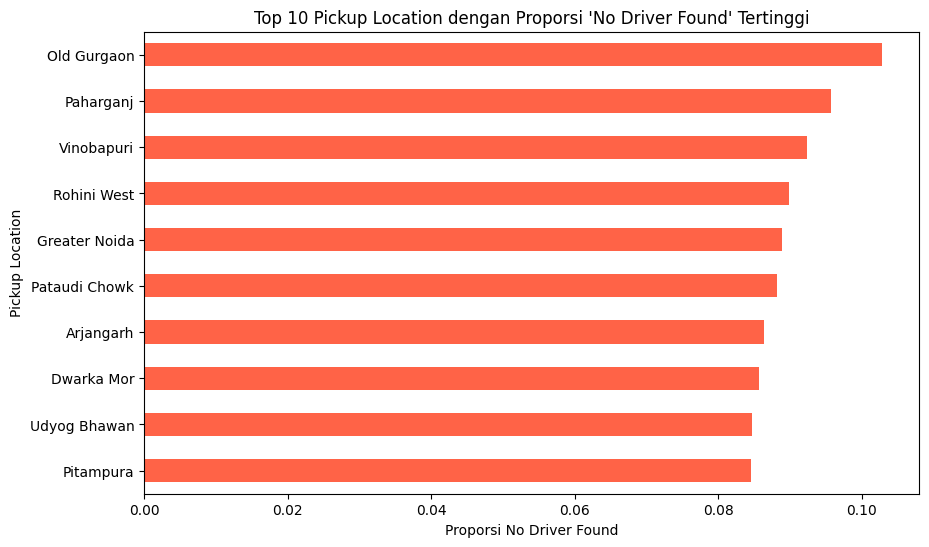

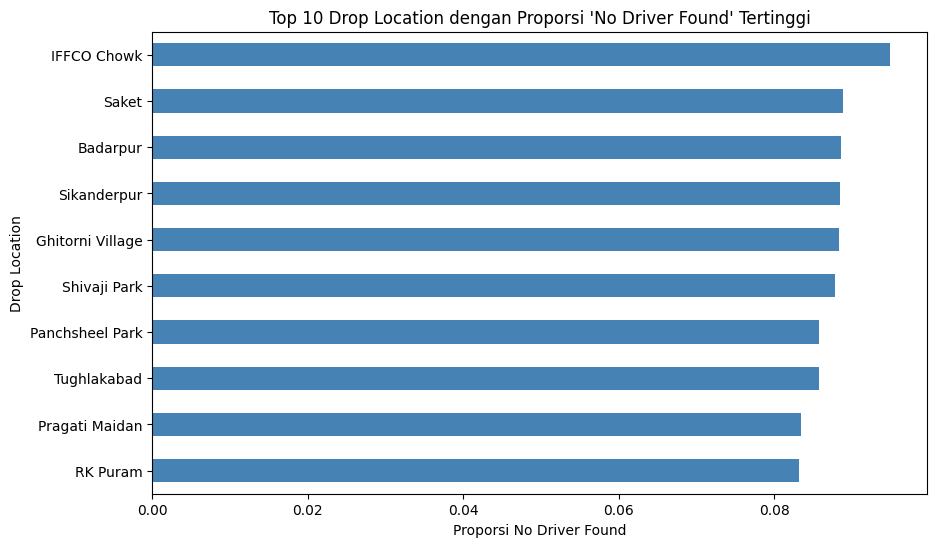

In [134]:
# cancel-rate khusus status "No Driver Found" per pickup
pickup_ndf_rate = df_eda.groupby("Pickup Location")["is_no_driver_found"].mean()

# ambil 10 pickup tertinggi
top10_pickup_ndf = pickup_ndf_rate.sort_values(ascending=False).head(10)

# drop location juga
drop_ndf_rate = df_eda.groupby("Drop Location")["is_no_driver_found"].mean()
top10_drop_ndf = drop_ndf_rate.sort_values(ascending=False).head(10)

# --- Pickup ---
plt.figure(figsize=(10,6))
top10_pickup_ndf.sort_values().plot(kind="barh", color="tomato")
plt.xlabel("Proporsi No Driver Found")
plt.title("Top 10 Pickup Location dengan Proporsi 'No Driver Found' Tertinggi")
plt.show()

# --- Drop ---
plt.figure(figsize=(10,6))
top10_drop_ndf.sort_values().plot(kind="barh", color="steelblue")
plt.xlabel("Proporsi No Driver Found")
plt.title("Top 10 Drop Location dengan Proporsi 'No Driver Found' Tertinggi")
plt.show()

Demikian hasil 10 lokasi teratas yang paling banyak mengalami "No Driver Found"

dengan demikian, disarankan kepada Manajemen operasional Uber untuk menambah armada di 10 lokasi pickup tersebut karena disana kekurangan driver. 
 

#### 2. Apakah lokasi penjemputan dan pemberhentian mempengaruhi kemungkinan booking di cancel? Sepuluh lokasi penjemputan dan pemberhentian mana yang mempunyai tingkat pembatalan tertinggi di data ini?

In [135]:
condition = (df_eda["Booking Status"] == "No Driver Found")
df_eda.drop(df_eda[condition].index, inplace=True)

jika tidak dapat menemukan driver, maka cancel tidak dapat dilakukan, maka perlu drop No Driver Found

In [144]:
df_eda["is_cancel"] = df_eda["Booking Status"].apply(
    lambda x: 0 if x.strip().lower() == "completed" else 1
)

buat kolom baru untuk menentukan apakah booking selesai atau tidak

In [137]:
pickup_cancel_rate = (
    df_eda.groupby("Pickup Location")["is_cancel"].mean()
)
pickup_cancel_rate.sort_values(ascending=False)

Pickup Location
Vinobapuri           0.397590
Akshardham           0.396154
Chhatarpur           0.370757
Pragati Maidan       0.367059
Badshahpur           0.365915
                       ...   
Sushant Lok          0.305063
Welcome              0.302267
Anand Vihar          0.300000
Gurgaon Sector 29    0.299868
Subhash Chowk        0.294545
Name: is_cancel, Length: 176, dtype: float64

terlihat bahwa daerah dengan kemungkinan cancel paling tinggi ada pada Vinobapuri, dan paling rendah ada pada Welcome.

In [138]:
df_eda["Pickup_TE"] = df_eda["Pickup Location"].map(pickup_cancel_rate)
df_eda.head()

,Date,Time,Booking ID,Booking Status,Customer ID,Vehicle Type,Pickup Location,Drop Location,Avg VTAT,Avg CTAT,...,Incomplete Rides,Incomplete Rides Reason,Booking Value,Ride Distance,Driver Ratings,Customer Rating,Payment Method,is_no_driver_found,is_cancel,Pickup_TE
1,2024-11-29,18:01:39,"""CNR1326809""",Incomplete,"""CID4604802""",Go Sedan,Shastri Nagar,Gurgaon Sector 56,4.9,14.0,...,1.0,Vehicle Breakdown,237.0,5.73,NaN,NaN,UPI,0,1,0.322181
2,2024-08-23,08:56:10,"""CNR8494506""",Completed,"""CID9202816""",Auto,Khandsa,Malviya Nagar,13.4,25.8,...,NaN,NaN,627.0,13.58,4.9,4.9,Debit Card,0,0,0.324324
3,2024-10-21,17:17:25,"""CNR8906825""",Completed,"""CID2610914""",Premier Sedan,Central Secretariat,Inderlok,13.1,28.5,...,NaN,NaN,416.0,34.02,4.6,5.0,UPI,0,0,0.332907
4,2024-09-16,22:08:00,"""CNR1950162""",Completed,"""CID9933542""",Bike,Ghitorni Village,Khan Market,5.3,19.6,...,NaN,NaN,737.0,48.21,4.1,4.3,UPI,0,0,0.318681
5,2024-02-06,09:44:56,"""CNR4096693""",Completed,"""CID4670564""",Auto,AIIMS,Narsinghpur,5.1,18.1,...,NaN,NaN,316.0,4.85,4.1,4.6,UPI,0,0,0.342690


buat kolom baru untuk mempermudah prediksi dengan nama ``` Pickup_TE ```

In [139]:
destination_cancel_rate = (
    df_eda.groupby("Drop Location")["is_cancel"].mean()
)
destination_cancel_rate.sort_values(ascending=False)

Drop Location
Vasant Kunj           0.384615
Bhikaji Cama Place    0.377358
RK Puram              0.374055
Gurgaon Sector 29     0.370565
Keshav Puram          0.367684
                        ...   
Badarpur              0.296937
Sultanpur             0.294686
Lal Quila             0.294643
Noida Extension       0.286067
Preet Vihar           0.279070
Name: is_cancel, Length: 176, dtype: float64

terlihat bahwa daerah dengan kemungkinan cancel paling tinggi ada pada Vasant Kunj, dan paling rendah ada pada Preet Vihar.

In [140]:
df_eda["Drop_TE"] = df_eda["Drop Location"].map(pickup_cancel_rate)
df_eda.head()

,Date,Time,Booking ID,Booking Status,Customer ID,Vehicle Type,Pickup Location,Drop Location,Avg VTAT,Avg CTAT,...,Incomplete Rides Reason,Booking Value,Ride Distance,Driver Ratings,Customer Rating,Payment Method,is_no_driver_found,is_cancel,Pickup_TE,Drop_TE
1,2024-11-29,18:01:39,"""CNR1326809""",Incomplete,"""CID4604802""",Go Sedan,Shastri Nagar,Gurgaon Sector 56,4.9,14.0,...,Vehicle Breakdown,237.0,5.73,NaN,NaN,UPI,0,1,0.322181,0.325974
2,2024-08-23,08:56:10,"""CNR8494506""",Completed,"""CID9202816""",Auto,Khandsa,Malviya Nagar,13.4,25.8,...,NaN,627.0,13.58,4.9,4.9,Debit Card,0,0,0.324324,0.336114
3,2024-10-21,17:17:25,"""CNR8906825""",Completed,"""CID2610914""",Premier Sedan,Central Secretariat,Inderlok,13.1,28.5,...,NaN,416.0,34.02,4.6,5.0,UPI,0,0,0.332907,0.328932
4,2024-09-16,22:08:00,"""CNR1950162""",Completed,"""CID9933542""",Bike,Ghitorni Village,Khan Market,5.3,19.6,...,NaN,737.0,48.21,4.1,4.3,UPI,0,0,0.318681,0.352490
5,2024-02-06,09:44:56,"""CNR4096693""",Completed,"""CID4670564""",Auto,AIIMS,Narsinghpur,5.1,18.1,...,NaN,316.0,4.85,4.1,4.6,UPI,0,0,0.342690,0.365482


buat kolom baru untuk mempermudah prediksi dengan nama ``` Drop_TE ```

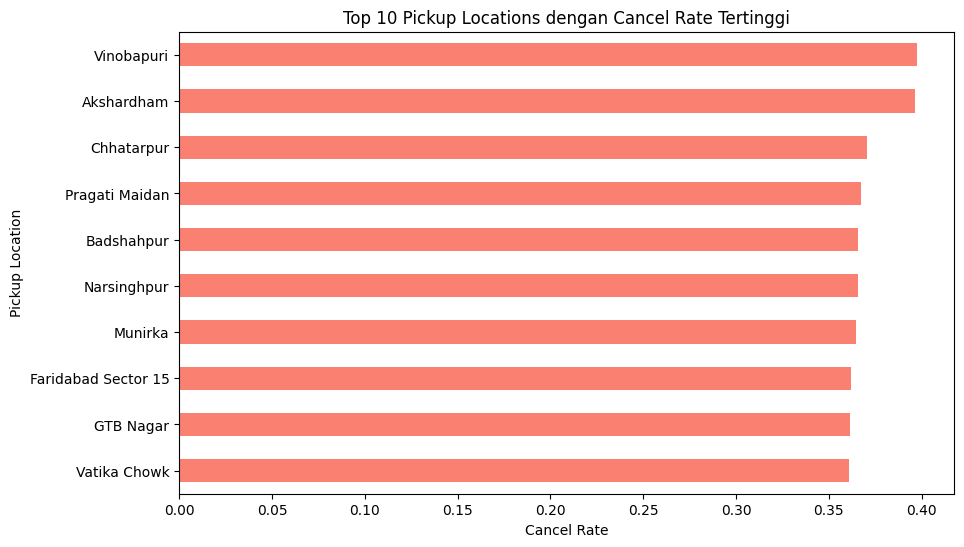

In [141]:
pickup_cancel_rate = df_eda.groupby("Pickup Location")["is_cancel"].mean()
top10_pickup = pickup_cancel_rate.sort_values(ascending=False).head(10)

plt.figure(figsize=(10,6))
top10_pickup.sort_values().plot(kind="barh", color="salmon")
plt.xlabel("Cancel Rate")
plt.title("Top 10 Pickup Locations dengan Cancel Rate Tertinggi")
plt.show()

Dari sini terlihat 10 tempat pickup dengan kemungkinan cancel paling tinggi

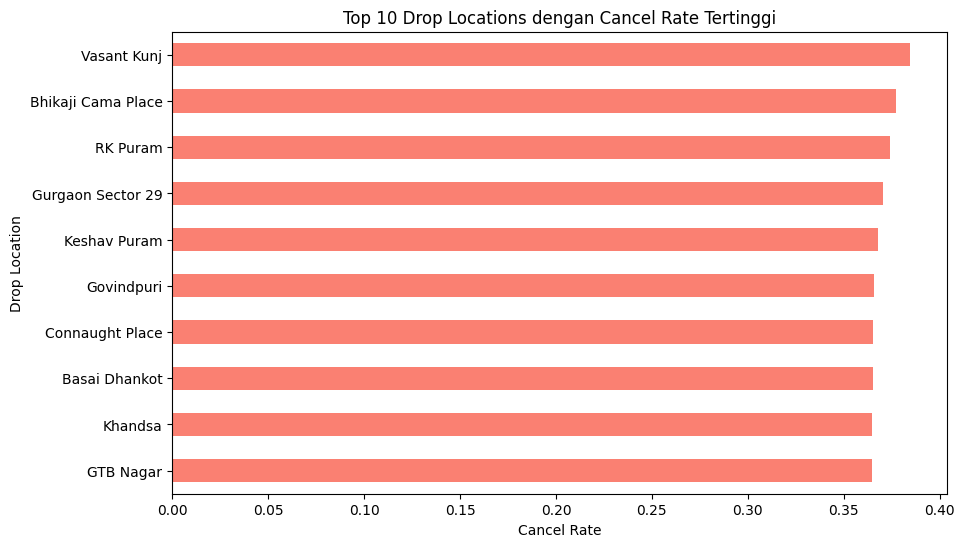

In [142]:
drop_cancel_rate = df_eda.groupby("Drop Location")["is_cancel"].mean()
top10_drop = drop_cancel_rate.sort_values(ascending=False).head(10)

plt.figure(figsize=(10,6))
top10_drop.sort_values().plot(kind="barh", color="salmon")
plt.xlabel("Cancel Rate")
plt.title("Top 10 Drop Locations dengan Cancel Rate Tertinggi")
plt.show()

Dari sini terlihat 10 tempat drop dengan kemungkinan cancel paling tinggi

#### 3. Apakah Vehicle Type mempengaruhi kemungkinan booking batal? Berapa persentase pembatalan pada masing-masing Vehicle Type?

In [145]:
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2_corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    r_corr = r - ((r-1)**2)/(n-1)
    k_corr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2_corr / min((k_corr-1), (r_corr-1)))

cramers_v_value = cramers_v(df_eda["Vehicle Type"], df_eda["is_cancel"])
print(f"Cramér’s V correlation between Vehicle Type and is_cancel: {cramers_v_value:.4f}")

Cramér’s V correlation between Vehicle Type and is_cancel: 0.0000


Karena kolom ```Vehicle Type``` dan ```is_cancel``` adalah kolom kategorikal dan biner, maka digunakan Cramér’s V untuk menghitung korelasi

Hasil ini menunjukkan tidak ada hubungan signifikan antara ```Vehicle Type```  dengan ```is_cancel```. Secara statistik, faktor jenis kendaraan tidak memengaruhi apakah booking akan dibatalkan atau tidak.

In [147]:
cancel_rate = df_eda.groupby("Vehicle Type")["is_cancel"].mean().sort_values(ascending=False)
print(cancel_rate)

Vehicle Type
Go Sedan         0.337755
Auto             0.333439
Go Mini          0.332554
eBike            0.332280
Bike             0.332160
Premier Sedan    0.331472
Uber XL          0.326802
Name: is_cancel, dtype: float64


Cancel Rate per Vehicle Type

Walaupun korelasi sangat lemah, cancel rate antar vehicle type terlihat hampir seragam, berkisar di angka ~32–34%:
- Tertinggi: Go Sedan (33.8%)
- Terendah: Uber XL (32.7%)
- Selisih antar kategori sangat kecil (~1%).

Artinya, pola pembatalan cukup konsisten di semua jenis kendaraan, tidak ada satu tipe kendaraan tertentu yang secara drastis lebih sering dibatalkan.

C:\Users\wario\AppData\Local\Temp\ipykernel_12864\3442576935.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cancel_rate.index, y=cancel_rate.values, palette="viridis")


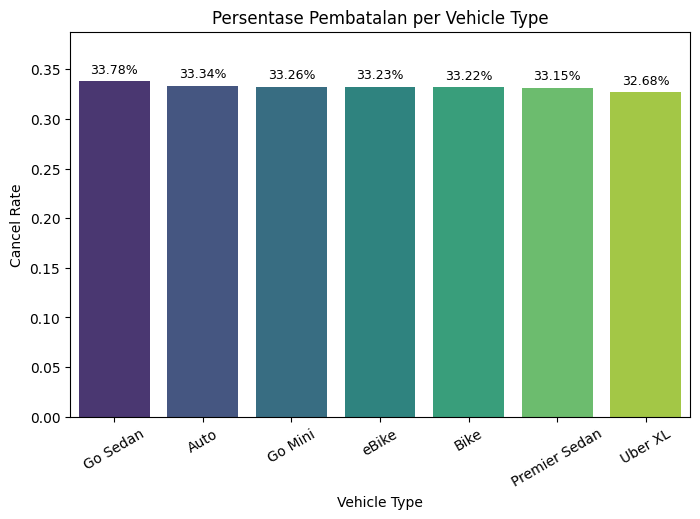

In [148]:
plt.figure(figsize=(8,5))
sns.barplot(x=cancel_rate.index, y=cancel_rate.values, palette="viridis")

# Tambahkan label persentase di atas bar
for i, v in enumerate(cancel_rate.values):
    plt.text(i, v + 0.005, f"{v*100:.2f}%", ha="center", va="bottom", fontsize=9)

plt.ylabel("Cancel Rate")
plt.xlabel("Vehicle Type")
plt.title("Persentase Pembatalan per Vehicle Type")
plt.xticks(rotation=30)
plt.ylim(0, cancel_rate.max() + 0.05)
plt.show()

Rekomendasi Bisnis

- Fokus pada faktor lain

Karena vehicle type bukan faktor signifikan, analisis perlu difokuskan ke variabel lain yang lebih berpengaruh terhadap cancel (misalnya: jam booking, pickup/drop location, waktu tunggu pengemudi, atau harga perjalanan).

- Pantau konsistensi cancel rate

Walaupun perbedaan kecil, Go Sedan terlihat sedikit lebih tinggi cancel rate-nya dibandingkan jenis lain. Perlu dipantau apakah ada faktor spesifik (misalnya jumlah driver Go Sedan lebih sedikit, waktu tunggu lebih lama, atau harga relatif lebih tinggi) yang memicu pembatalan.

- Strategi mitigasi pembatalan

Karena cancel rate relatif seragam, strategi untuk menurunkan cancel bisa dibuat global dan tidak perlu terlalu dibedakan per vehicle type. Misalnya:

    - Meningkatkan estimasi waktu kedatangan (ETA) yang lebih akurat
    - Memberikan insentif kepada driver untuk cepat menerima order
    - Menawarkan diskon kecil atau cashback untuk pelanggan agar tidak mudah cancel.

#### 4. Apakah Vehicle Type mempengaruhi kemungkinan booking tidak selesai? Berapa persentase booking tidak selesai pada masing-masing Vehicle Type?

In [149]:
# buat kolom penanda 1 kalau booking tidak selesai, 0 kalau selesai
df_eda["is_not_completed"] = np.where(df_eda["Booking Status"] == "Completed", 0, 1)

buat kolom baru untuk mempermudah prediksi dengan nama ``` is_not_completed ```

In [150]:
# Crosstab
cont_table = pd.crosstab(df_eda["Vehicle Type"], df_eda["is_not_completed"])

# Chi-square test
chi2, p, dof, expected = chi2_contingency(cont_table)

# Hitung Cramér’s V
n = cont_table.sum().sum()
cramers_v = np.sqrt(chi2 / (n * (min(cont_table.shape) - 1)))

print(f"Cramér’s V correlation between Vehicle Type and is_not_completed: {cramers_v:.4f}")
print(f"P-value: {p}")

Cramér’s V correlation between Vehicle Type and is_not_completed: 0.0050
P-value: 0.7402219520233151


Nilai Cramér’s V = 0.005 (sangat dekat dengan 0).

P-value = 0.74 (jauh lebih besar dari 0.05). Artinya, tidak ada hubungan signifikan antara Vehicle Type dengan status booking selesai/tidak selesai.

In [151]:
not_completed_rate = (
    df_eda.groupby("Vehicle Type")["is_not_completed"]
    .mean()
    .sort_values(ascending=False)
)

print(not_completed_rate)

Vehicle Type
Go Sedan         0.337755
Auto             0.333439
Go Mini          0.332554
eBike            0.332280
Bike             0.332160
Premier Sedan    0.331472
Uber XL          0.326802
Name: is_not_completed, dtype: float64


- Persentase booking tidak selesai cukup seragam, berkisar 32–34% di semua tipe kendaraan.
- Tipe dengan rate sedikit lebih tinggi: Go Sedan (33.8%).
- Tipe dengan rate sedikit lebih rendah: Uber XL (32.7%).
- Selisih antar-vehicle type sangat kecil (<1.1%), sehingga secara praktis perbedaan ini tidak berarti.

C:\Users\wario\AppData\Local\Temp\ipykernel_12864\648019259.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


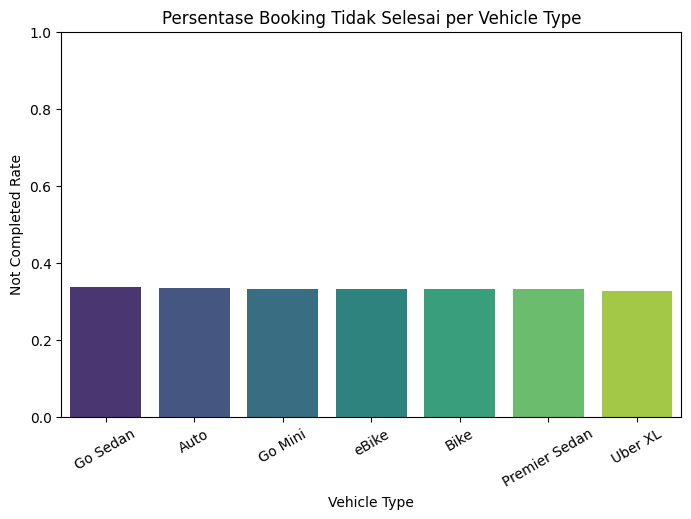

In [152]:
plt.figure(figsize=(8, 5))
sns.barplot(
    x=not_completed_rate.index,
    y=not_completed_rate.values,
    palette="viridis"
)
plt.title("Persentase Booking Tidak Selesai per Vehicle Type")
plt.ylabel("Not Completed Rate")
plt.xlabel("Vehicle Type")
plt.xticks(rotation=30)
plt.ylim(0, 1)
plt.show()

1. Fokus Analisa ke Faktor Lain

Karena Vehicle Type tidak berpengaruh signifikan, lebih baik alihkan fokus ke variabel lain yang mungkin lebih kuat hubungannya dengan pembatalan, seperti:
- Waktu booking (jam sibuk vs non-sibuk)
- Pickup location (akses sulit, kemacetan, supply driver rendah)

2. Optimasi Supply dan Demand

- Tingkat pembatalan seragam across vehicle types → kemungkinan besar dipengaruhi oleh ketersediaan driver atau mismatch supply-demand.
- Lakukan monitoring real-time driver availability per area, bukan per tipe kendaraan.

3. Komunikasi ke Pengguna

- Karena tidak ada perbedaan berarti antar kendaraan, jangan batasi atau rekomendasikan kendaraan tertentu untuk mengurangi cancel.
- Lebih efektif memberikan informasi estimasi waktu tunggu / ketersediaan agar pelanggan bisa membuat keputusan yang lebih realistis.

#### 5. Apakah jam booking mempengaruhi kemungkinan pembatalan (cancel) order?

In [153]:
df_eda["Book_Hour"] = pd.to_datetime(df_eda["Time"], format="%H:%M:%S").dt.hour
df_eda["Book_Hour"] 

1         18
2          8
3         17
4         22
5          9
          ..
149995    19
149996    15
149997    10
149998     7
149999    15
Name: Book_Hour, Length: 139500, dtype: int32

kita perlu menambahkan tabel baru untuk menunjukan waktu booking dengan satuan jam untuk mempermudah analisa

In [154]:
cancel_rate_by_hour = (
    df_eda.groupby("Book_Hour")["is_cancel"]
    .agg(["mean", "count"])
    .rename(columns={"mean": "Cancel_Rate", "count": "Total_Bookings"})
)

print(cancel_rate_by_hour)

           Cancel_Rate  Total_Bookings
Book_Hour                             
0             0.329688            1280
1             0.337600            1250
2             0.307630            1232
3             0.330218            1284
4             0.326299            1232
5             0.340131            2599
6             0.322690            3852
7             0.339127            5063
8             0.331610            6384
9             0.335077            7646
10            0.330011            8930
11            0.325459            7789
12            0.330245            6477
13            0.337650            5097
14            0.343488            6565
15            0.339386            7655
16            0.331991            8937
17            0.333657           10295
18            0.337998           11506
19            0.338780           10281
20            0.329500            8956
21            0.323311            7550
22            0.337223            5056
23            0.333591   

1. Cancel Rate per Jam
    - Cancel Rate stabil di kisaran 32% – 34% sepanjang hari.
    - Tidak ada jam tertentu yang terlihat menonjol signifikan lebih tinggi/rendah dari jam lainnya.

2. Volume Booking per Jam
    - Booking meningkat signifikan mulai pagi (06:00 – 10:00), puncak pada 18:00 dengan 11.5K booking, lalu menurun bertahap sampai malam.
    - Artinya, walaupun Cancel Rate relatif sama, jumlah absolut order yang dibatalkan lebih banyak terjadi di jam sibuk karena volumenya tinggi.

In [155]:
cont_table = pd.crosstab(df_eda["Book_Hour"], df_eda["is_cancel"])
chi2, p, dof, expected = chi2_contingency(cont_table)

n = cont_table.sum().sum()
phi2 = chi2 / n
r, k = cont_table.shape
phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
rcorr = r - ((r-1)**2)/(n-1)
kcorr = k - ((k-1)**2)/(n-1)
cramers_v = np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

print(f"Cramér’s V correlation: {cramers_v:.4f}")
print(f"P-value: {p:.4f}")

Cramér’s V correlation: 0.0000
P-value: 0.5089


Korelasi Statistik (Chi-Square & Cramér’s V)

Cramér’s V = 0.0000 → menunjukkan tidak ada korelasi antara jam booking dan kemungkinan cancel.

P-value = 0.51 > 0.05 → secara statistik, jam booking tidak signifikan mempengaruhi cancelation rate.

Text(0.5, 0, 'Book Hour (0-23)')

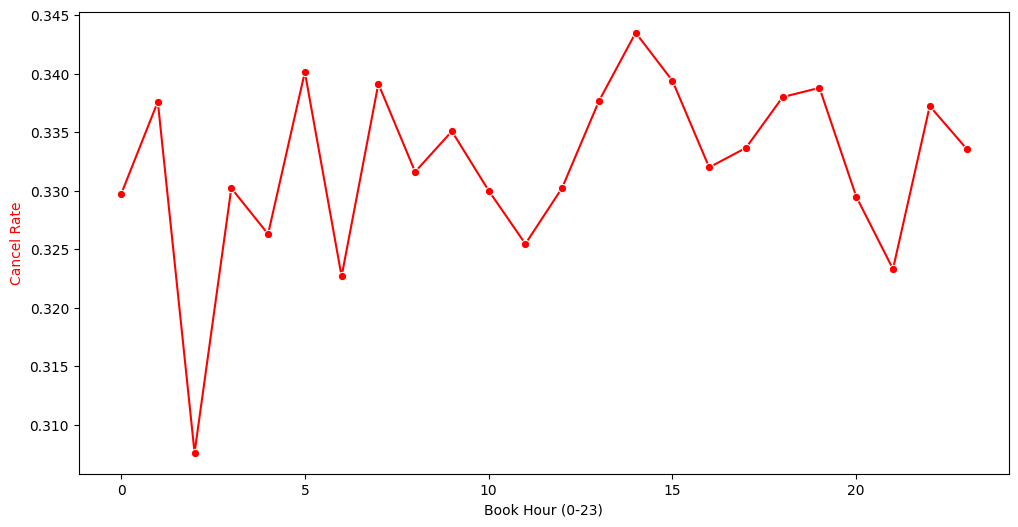

In [156]:
fig, ax1 = plt.subplots(figsize=(12,6))

# Plot cancel rate (line chart)
sns.lineplot(data=cancel_rate_by_hour, x=cancel_rate_by_hour.index, y="Cancel_Rate", marker="o", color="red", ax=ax1)
ax1.set_ylabel("Cancel Rate", color="red")
ax1.set_xlabel("Book Hour (0-23)")

Rekomendasi Bisnis

1. Fokus pada Jam Sibuk (High Volume Hours)
    - Walaupun Cancel Rate seragam, dampak finansial terbesar ada di jam dengan volume tinggi (07:00 – 20:00).
    - Perlu strategi driver supply balancing di jam-jam tersebut untuk mengurangi jumlah absolut pembatalan.

2. Driver Allocation & Incentives
    - Tambah insentif driver untuk shift sore – malam (17:00 – 20:00), ketika demand tinggi.
    - Perbanyak notifikasi untuk standby driver sebelum jam puncak.

3. Customer Experience Monitoring
    - Karena cancelation tidak dipengaruhi jam tertentu, faktor lain (misalnya lokasi penjemputan, tipe kendaraan, atau jarak perjalanan) mungkin lebih dominan.

# 5. Feature Engineering

## Split Betweet X (Features) and Y (target)

In [28]:
df_x = df_eda.drop(['is_cancel'], axis=1)
df_y = df_eda['is_cancel']
df_x.head()

,Date,Time,Booking ID,Booking Status,Customer ID,Vehicle Type,Pickup Location,Drop Location,Avg VTAT,Avg CTAT,...,Booking Value,Ride Distance,Driver Ratings,Customer Rating,Payment Method,is_no_driver_found,Pickup_TE,Drop_TE,is_not_completed,Book_Hour
1,2024-11-29,18:01:39,"""CNR1326809""",Incomplete,"""CID4604802""",Go Sedan,Shastri Nagar,Gurgaon Sector 56,4.9,14.0,...,237.0,5.73,NaN,NaN,UPI,0,0.322181,0.325974,1,18
2,2024-08-23,08:56:10,"""CNR8494506""",Completed,"""CID9202816""",Auto,Khandsa,Malviya Nagar,13.4,25.8,...,627.0,13.58,4.9,4.9,Debit Card,0,0.324324,0.336114,0,8
3,2024-10-21,17:17:25,"""CNR8906825""",Completed,"""CID2610914""",Premier Sedan,Central Secretariat,Inderlok,13.1,28.5,...,416.0,34.02,4.6,5.0,UPI,0,0.332907,0.328932,0,17
4,2024-09-16,22:08:00,"""CNR1950162""",Completed,"""CID9933542""",Bike,Ghitorni Village,Khan Market,5.3,19.6,...,737.0,48.21,4.1,4.3,UPI,0,0.318681,0.352490,0,22
5,2024-02-06,09:44:56,"""CNR4096693""",Completed,"""CID4670564""",Auto,AIIMS,Narsinghpur,5.1,18.1,...,316.0,4.85,4.1,4.6,UPI,0,0.342690,0.365482,0,9


memisahkan kolom is_cancel dengan kolom lainnya, karena kolom is_cancel yang akan di prediksi sebagai targetnya

## Splitting between Train Set and Test set

In [29]:
X_train, X_test, y_train, y_test = train_test_split(df_x, df_y, test_size = 0.2, random_state = 9,)
print('Train Size', X_train.shape)
print('Test Size', X_test.shape)

Train Size (111600, 26)
Test Size (27900, 26)


data dipisah menjadi data train dan test dengan proporsi 80:20 menggunakan train_test_split. 111600 baris digunakan sebagai data train dan 27900 baris digunakan sebagai data test.

## Handling Cardinality

In [30]:
X_train.columns

Index(['Date', 'Time', 'Booking ID', 'Booking Status', 'Customer ID',
       'Vehicle Type', 'Pickup Location', 'Drop Location', 'Avg VTAT',
       'Avg CTAT', 'Cancelled Rides by Customer',
       'Reason for cancelling by Customer', 'Cancelled Rides by Driver',
       'Driver Cancellation Reason', 'Incomplete Rides',
       'Incomplete Rides Reason', 'Booking Value', 'Ride Distance',
       'Driver Ratings', 'Customer Rating', 'Payment Method',
       'is_no_driver_found', 'Pickup_TE', 'Drop_TE', 'is_not_completed',
       'Book_Hour'],
      dtype='object')

Berikut kolom yang kita butuhkan :

1. Book_Hour
- Waktu booking bisa mempengaruhi ketersediaan driver / probabilitas cancel (jam sibuk vs sepi). kolom numerik tapi dianggap sebagai kategorikal numerik
- Perilaku Supply–Demand Bergantung Jam. Jam sibuk (pagi pergi kerja, sore pulang kantor) maka cancel/no driver lebih sering. Lainnya pada malam hari, driver lebih sedikit.

2. Vehicle Type
- Jenis kendaraan mempengaruhi supply dan demand.

3. Avg VTAT, Avg CTAT
- Waktu tunggu dan perjalanan rata-rata. Bisa indikasi kemudahan mendapatkan driver / kesabaran customer.

5. is_cancel
- kolom ini akan kita gunakan sebagai target

6. Ride Distance
- Kolom ini menggambarkan jarak tempuh kendaraan, bisa berpengaruh terhadap kemungkinan cancel

7. Booking Value
- Kolom ini menunjukan harga yang ditentukan untuk booking tersebut, bisa berpengaruh terhadap kemungkinan cancel

Berikut kolom yang tidak dibutuhkan :

1. Booking ID, Customer ID 
- kolom identifier dimana nilai berbeda pada setiap kolom, tidak perlu dipakai

2. Cancelled Rides by Customer, Cancelled Rides by Driver, Incomplete Rides 
- tidak perlu menggunakan ini karena sudah diwakilkan oleh kolom Booking Status

3. Reason for cancelling by Customer, Driver Cancellation Reason, Incomplete Rides Reason
- kita tidak perlu menganalisa alasan dari booking status

4. Date
- tanggal tidak mempengaruhi pembatalan booking

5. Driver Ratings, Customer Rating, Payment Method
- Kolom ini akan berisi None/Nan ketika booking di cancel, jadi tidak perlu diperhatikan

6. Pickup Location dan Drop Location
- kolom penunjuk tempat, ini bisa berpengaruh terhadap kemungkinan cancel booking, namun terlalu banyak variasi data sehingga perlu kita lakukan target encoding dengan membuat kolom baru yang berisikan 

7. Booking Status
- booking status sudah diwakilkan oleh is_cancel, karena kita hanya ingin memprediksi apakah booking di cancel atau tidak

8. is_no_driver_found, Pickup_TE, Drop_TE, is_not_completed
- kolom ini adalah kolom yang ditambahkan untuk mempermudah pengerjaan EDA, tidak perlu dipakai lagi untuk modeling

9. Time 
- Waktu booking sudah diwakilkan oleh Book_Hour

10. Pickup_TE dan Drop_TE
- kolom ini dapat mewakilkan kolom Pickup Location dan Drop Location untuk mempermudah proses prediksi cancel. tapi kolom ini dipengaruhi langsung oleh target jadi tidak boleh dipakai.

## Handling Missing Value

In [66]:
x_train_missing = X_train.copy()
x_test_missing  = X_test.copy()

In [32]:
missing_values = x_train_missing.isna().sum()
missing_values = missing_values[missing_values > 0]

# Calculate percentage
missing_percent = (missing_values / len(x_train_missing)) * 100

# Combine count and percentage 
missing_df = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage (%)': missing_percent.round(2),
})

print(missing_df)

                                   Missing Values  Percentage (%)
Avg CTAT                                    29993           26.88
Cancelled Rides by Customer                103204           92.48
Reason for cancelling by Customer          103204           92.48
Cancelled Rides by Driver                   90003           80.65
Driver Cancellation Reason                  90003           80.65
Incomplete Rides                           104409           93.56
Incomplete Rides Reason                    104409           93.56
Booking Value                               29993           26.88
Ride Distance                               29993           26.88
Driver Ratings                              37184           33.32
Customer Rating                             37184           33.32
Payment Method                              29993           26.88


###  Avg CTAT Missing Value 

Dari sekian banyak kolom yang memiliki missing value, Avg CTAT adalah salah satu kolom yang akan kita gunakan untuk perhitungan prediksi. Jadi jika dalam 1 row ada Avg CTAT yang kosong, kita coba cari semua baris lain dengan Pickup Location dan Drop Location yang sama lalu mengambil nilai rata - ratanya, karena jika posisi tujuan awal dan tujuan akhir sama, maka kemungkinan besar waktu tempuh juga akan sama.

In [69]:
# hitung rata-rata Avg CTAT per kombinasi pickup-drop
mean_ctat_by_loc = (
    x_train_missing
    .groupby(["Pickup Location", "Drop Location"])["Avg CTAT"]
    .mean()
)

# fungsi isi langsung ke Avg CTAT
def fill_ctat(row):
    if pd.isna(row["Avg CTAT"]):
        return mean_ctat_by_loc.get((row["Pickup Location"], row["Drop Location"]), np.nan)
    else:
        return row["Avg CTAT"]

# overwrite langsung ke kolom Avg CTAT
x_train_missing["Avg CTAT"] = x_train_missing.apply(fill_ctat, axis=1)    
x_test_missing["Avg CTAT"] = x_test_missing.apply(fill_ctat, axis=1)    

missing_values = x_train_missing["Avg CTAT"].isna().sum() 
missing_values = missing_values[missing_values > 0] 
missing_percent = (missing_values / len(x_train_missing)) * 100

print(f"Missing Values: {missing_values}, Percentage (%): {missing_percent.round(2)}")

Missing Values: [2150], Percentage (%): [1.93]


Ternyata masih terdapat 1399 baris dengan nilai Avg CTAT null dan kombinasi Pickup Location dan Drop Location yang tidak memiliki nilai Avg CTAT pada baris lainnya. Dikarenakan jumlahnya hanya 1% dari keseluruhan data, maka kita akan isi dengan data mean atau median supaya data baris masih bisa kita retain. 

In [68]:
x_train_missing["Avg CTAT"].describe()

count    109450.000000
mean         29.153573
std           8.298514
min          10.000000
25%          22.650000
50%          28.900000
75%          35.600000
max          45.000000
Name: Avg CTAT, dtype: float64

nilai mean dan median tidak jauh berbeda, sebaiknya kita gunakan nilai median yang biasanya lebih tahan terhadap outliers

In [70]:
# kalau masih ada missing → isi dengan median
x_train_missing["Avg CTAT"].fillna(x_train_missing["Avg CTAT"].median(), inplace=True)
x_test_missing["Avg CTAT"].fillna(x_train_missing["Avg CTAT"].median(), inplace=True)

# cek apakah masih ada missing
print("Sisa missing:", x_train_missing["Avg CTAT"].isna().sum())

Sisa missing: 0


C:\Users\wario\AppData\Local\Temp\ipykernel_12864\783826927.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  x_train_missing["Avg CTAT"].fillna(x_train_missing["Avg CTAT"].median(), inplace=True)
C:\Users\wario\AppData\Local\Temp\ipykernel_12864\783826927.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting value

Dengan demikian, kolom Avg CTAT sudah tidak memiliki nilai None/Nan

###  Ride Distance Missing Value 

Dari sekian banyak kolom yang memiliki missing value, Ride Distance adalah salah satu kolom yang akan kita gunakan untuk perhitungan prediksi. Jadi jika dalam 1 row ada Ride Distance yang kosong, kita coba cari semua baris lain dengan Pickup Location dan Drop Location yang sama lalu mengambil nilai rata - ratanya, karena jika posisi tujuan awal dan tujuan akhir sama, maka kemungkinan besar jarak yang di tempuh juga akan sama.

In [71]:
# hitung rata-rata Ride Distance per kombinasi pickup-drop
mean_ctat_by_loc = (
    x_train_missing
    .groupby(["Pickup Location", "Drop Location"])["Ride Distance"]
    .mean()
)
# fungsi isi: jika Ride Distance kosong, isi dengan rata-rata kombinasi pickup-drop
def fill_ctat(row):
    if pd.isna(row["Ride Distance"]):
        return mean_ctat_by_loc.get((row["Pickup Location"], row["Drop Location"]), np.nan)
    else:
        return row["Ride Distance"]

# overwrite langsung ke kolom Avg CTAT
x_train_missing["Ride Distance"] = x_train_missing.apply(fill_ctat, axis=1)
x_test_missing["Ride Distance"] = x_test_missing.apply(fill_ctat, axis=1)

missing_values = x_train_missing["Ride Distance"].isna().sum()
missing_values = missing_values[missing_values > 0]
missing_percent = (missing_values / len(x_train_missing)) * 100

print(f"Missing Values: {missing_values}, Percentage (%): {missing_percent.round(2)}")

Missing Values: [2150], Percentage (%): [1.93]


Ternyata masih terdapat 1399 baris dengan nilai Ride Distance null dan kombinasi Pickup Location dan Drop Location yang tidak memiliki nilai Ride Distance pada baris lainnya. Dikarenakan jumlahnya hanya 1% dari keseluruhan data, maka kita akan isi dengan data mean atau median supaya data baris masih bisa kita retain. 

In [72]:
x_train_missing["Ride Distance"].describe()

count    109450.000000
mean         24.624841
std          13.028390
min           1.000000
25%          14.060000
50%          23.990000
75%          34.870000
max          50.000000
Name: Ride Distance, dtype: float64

nilai mean dan median tidak jauh berbeda, sebaiknya kita gunakan nilai median yang biasanya lebih tahan terhadap outliers

In [73]:
# kalau masih ada missing → isi dengan median
x_train_missing["Ride Distance"].fillna(x_train_missing["Ride Distance"].median(), inplace=True)
x_test_missing["Ride Distance"].fillna(x_train_missing["Ride Distance"].median(), inplace=True)

x_train_missing["Ride Distance"].isna().sum()

C:\Users\wario\AppData\Local\Temp\ipykernel_12864\654366310.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  x_train_missing["Ride Distance"].fillna(x_train_missing["Ride Distance"].median(), inplace=True)
C:\Users\wario\AppData\Local\Temp\ipykernel_12864\654366310.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are set

0

Dengan demikian, kolom Ride Distance sudah tidak memiliki nilai None/Nan

### Booking Value Missing Value 

Dari sekian banyak kolom yang memiliki missing value, Booking Value adalah salah satu kolom yang akan kita gunakan untuk perhitungan prediksi. Jadi jika dalam 1 row ada Booking Value yang kosong, kita coba cari semua baris lain dengan Pickup Location dan Drop Location yang sama lalu mengambil nilai rata - ratanya, karena jika posisi tujuan awal dan tujuan akhir sama, maka kemungkinan besar harga yang dibayar juga akan sama.

In [74]:
# hitung rata-rata Booking Value per kombinasi pickup-drop
mean_ctat_by_loc = (
    x_train_missing
    .groupby(["Pickup Location", "Drop Location"])["Booking Value"]
    .mean()
)
# fungsi isi: jika Booking Value kosong, isi dengan rata-rata kombinasi pickup-drop
def fill_ctat(row):
    if pd.isna(row["Booking Value"]):
        return mean_ctat_by_loc.get((row["Pickup Location"], row["Drop Location"]), np.nan)
    else:
        return row["Booking Value"]

# overwrite langsung ke kolom Booking Value
x_train_missing["Booking Value"] = x_train_missing.apply(fill_ctat, axis=1)
x_test_missing["Booking Value"] = x_test_missing.apply(fill_ctat, axis=1)

missing_values = x_train_missing["Booking Value"].isna().sum()
missing_values = missing_values[missing_values > 0]
missing_percent = (missing_values / len(x_train_missing)) * 100

print(f"Missing Values: {missing_values}, Percentage (%): {missing_percent.round(2)}")

Missing Values: [2150], Percentage (%): [1.93]


Ternyata masih terdapat 1399 baris dengan nilai Booking Value null dan kombinasi Pickup Location dan Drop Location yang tidak memiliki nilai Booking Value pada baris lainnya. Dikarenakan jumlahnya hanya 1% dari keseluruhan data, maka kita akan isi dengan data mean atau median supaya data baris masih bisa kita retain. 

In [75]:
x_train_missing["Booking Value"].describe()

count    109450.000000
mean        507.062694
std         367.168294
min          50.000000
25%         261.000000
50%         429.000000
75%         665.000000
max        4277.000000
Name: Booking Value, dtype: float64

nilai mean dan median terlihat sedikit berbeda, kemungkinan dikarenakan outliers, sebaiknya kita gunakan nilai median yang biasanya lebih tahan terhadap outliers

In [76]:
x_train_missing["Booking Value"].fillna(x_train_missing["Booking Value"].median(), inplace=True)
x_test_missing["Booking Value"].fillna(x_train_missing["Booking Value"].median(), inplace=True)

x_train_missing["Booking Value"].isna().sum()

C:\Users\wario\AppData\Local\Temp\ipykernel_12864\1622638947.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  x_train_missing["Booking Value"].fillna(x_train_missing["Booking Value"].median(), inplace=True)
C:\Users\wario\AppData\Local\Temp\ipykernel_12864\1622638947.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are s

0

Dengan demikian, kolom Booking Value sudah tidak memiliki nilai None/Nan

## Handling Cardinality

In [77]:
x_train_cardinal = x_train_missing.drop(["Booking ID", "Customer ID", "Cancelled Rides by Customer", "Reason for cancelling by Customer", "Cancelled Rides by Driver", "Driver Cancellation Reason", "Incomplete Rides", "Incomplete Rides Reason", "Date", "Time", "Driver Ratings", "Customer Rating", "Payment Method", "Pickup Location", "Drop Location", "Booking Status", "is_no_driver_found", "is_not_completed", "Pickup_TE", "Drop_TE"], axis=1)
x_test_cardinal = x_test_missing.drop(["Booking ID", "Customer ID", "Cancelled Rides by Customer", "Reason for cancelling by Customer", "Cancelled Rides by Driver", "Driver Cancellation Reason", "Incomplete Rides", "Incomplete Rides Reason", "Date", "Time", "Driver Ratings", "Customer Rating", "Payment Method", "Pickup Location", "Drop Location", "Booking Status", "is_no_driver_found", "is_not_completed", "Pickup_TE", "Drop_TE"], axis=1)
x_train_cardinal

,Vehicle Type,Avg VTAT,Avg CTAT,Booking Value,Ride Distance,Book_Hour
93686,Go Sedan,8.6,32.35,1274.000000,20.380000,20
70149,Go Mini,8.9,28.90,429.000000,23.990000,18
90104,Go Sedan,10.6,41.40,436.000000,29.320000,18
102032,Go Sedan,3.5,15.90,84.000000,15.110000,22
23444,Auto,5.7,25.10,1538.000000,29.910000,21
...,...,...,...,...,...,...
110609,Auto,3.0,33.60,714.000000,20.870000,19
75567,Go Mini,7.6,28.60,355.333333,11.596667,17
98182,Auto,7.6,38.00,151.000000,23.960000,18
5377,Go Mini,9.7,36.80,995.000000,5.670000,12


Setelah selesai Handling missing value menggunakan kolom lain yang ada, sekarang kita remove kolom yang tidak akan digunakan

In [78]:
listItem = []
for col in x_train_cardinal.columns:
  listItem.append([col, x_train_cardinal[col].nunique(), x_train_cardinal[col].unique()])

pd.DataFrame(columns=['nama kolom', 'jumlah nilai unique', 'nilai unique'], data=listItem)

,nama kolom,jumlah nilai unique,nilai unique
0,Vehicle Type,7,"[Go Sedan, Go Mini, Auto, Bike, eBike, Premier..."
1,Avg VTAT,181,"[8.6, 8.9, 10.6, 3.5, 5.7, 5.5, 3.6, 6.2, 9.1,..."
2,Avg CTAT,3152,"[32.349999999999994, 28.9, 41.4, 15.9, 25.1, 1..."
3,Booking Value,6921,"[1274.0, 429.0, 436.0, 84.0, 1538.0, 379.0, 10..."
4,Ride Distance,13643,"[20.38, 23.99, 29.32, 15.11, 29.91, 5.72000000..."
5,Book_Hour,24,"[20, 18, 22, 21, 5, 10, 11, 9, 17, 15, 13, 16,..."


## Feature Selection

untuk data numerikal, ada 2 pilihan untuk menghitung korelasi yaitu : 
- Pearson correlation -> mengukur linear relationship antar 2 variabel numerik. Cocok dipakai kalau distribusi data relatif normal dan hubungan cenderung linier. Cocok untuk menghitung korelasi dengan variable diskrit.
- Spearman correlation -> mengukur rank correlation (monotonic relationship, tidak harus linier). Cocok kalau datanya tidak normal, ada outlier banyak, atau hubungan antar variabel tidak linier. Cocok untuk menghitung korelasi dengan variable kategorial.

Untuk data kategorikal murni (nominal) – gunakan uji asosiasi:
- Chi-Square Test of Independence -> Menguji apakah ada hubungan signifikan antara dua variabel kategori (misalnya Vehicle Type vs Booking Status).
Hasil utama: p-value → kecil (<0.05) berarti ada asosiasi.
- Cramér’s V -> Ukuran kekuatan asosiasi kategori (0–1).
0 artinya tidak ada hubungan, 1 artinya hubungan sangat kuat.
Lebih stabil dibanding angka Chi-Square mentah yang tergantung ukuran sampel.

untuk kolom ```Vehicle Type```, dikarenakan ini adalah kolom kategorikal numerik, maka kita gunakan Chi-Square + Cramér’s V
untuk kolom ```Avg VTAT```, ```Pickup_TE```, ```Drop_TE```, ```Time_seconds``` dikarenakan ini adalah kolom numerikal yang diaggap sebagai diskrit, maka kita gunakan pearson

In [79]:
col_cat = ["Vehicle Type", "Book_Hour"]
col_num_cont = ["Avg VTAT", "Avg CTAT", "Ride Distance", "Booking Value"]
p_values = []
corrs = []
interpretasi = []
cols = []

for col in col_cat:

  ct = pd.crosstab(x_train_cardinal[col], y_train)
  chi2, p, dof, expected = chi2_contingency(ct)
  n = ct.sum().sum()
  cramers_v = np.sqrt(chi2 / (n * (min(ct.shape) - 1)))

  p_values.append(p)
  corrs.append(cramers_v)
  cols.append(col)

  if p < 0.05:
    interpretasi.append('ada korelasi')
  else :
    interpretasi.append('ga ada korelasi')

for col in col_num_cont:
  corr_coef, p_value = pearsonr(x_train_cardinal[col], y_train)

  p_values.append(p_value)
  corrs.append(corr_coef)
  cols.append(col)

  if p_value < 0.05:
    interpretasi.append('ada korelasi')
  else :
    interpretasi.append('ga ada korelasi')

pd.DataFrame({'nama kolom':cols,
              'p value':p_values,
              'Correlation/CramersV':corrs,
              'hasil': interpretasi})

,nama kolom,p value,Correlation/CramersV,hasil
0,Vehicle Type,6.282316e-01,0.006250,ga ada korelasi
1,Book_Hour,7.226461e-01,0.012919,ga ada korelasi
2,Avg VTAT,2.931248e-11,-0.019904,ada korelasi
3,Avg CTAT,0.000000e+00,-0.150969,ada korelasi
4,Ride Distance,0.000000e+00,-0.151233,ada korelasi
5,Booking Value,2.086926e-02,-0.006916,ada korelasi


Hasil uji Chi-Square dan Cramér’s V menunjukan bahwa kolom Vehicle Type dan Book_Hour tidak memiliki korelasi terhadap target, namun berdasarkan Domain Knowledge, tipe tertentu (kendaraan lebih besar) dapat mempengaruhi waktu jemput sehingga mempengaruhi kemungkinan penumpang cancel, sehingga Vehicle Type akan tetap di retain. 

Hasil uji Pearson menunjukkan beberapa fitur numerik berkorelasi dengan target seperti Avg VTAT, Avg CTAT_filled, dan Ride Distance_filled, jadi kita gunakan kolom ini. sedangkan kolom Booking Value_filled kita drop karena tidak berkorelasi dengan target. 

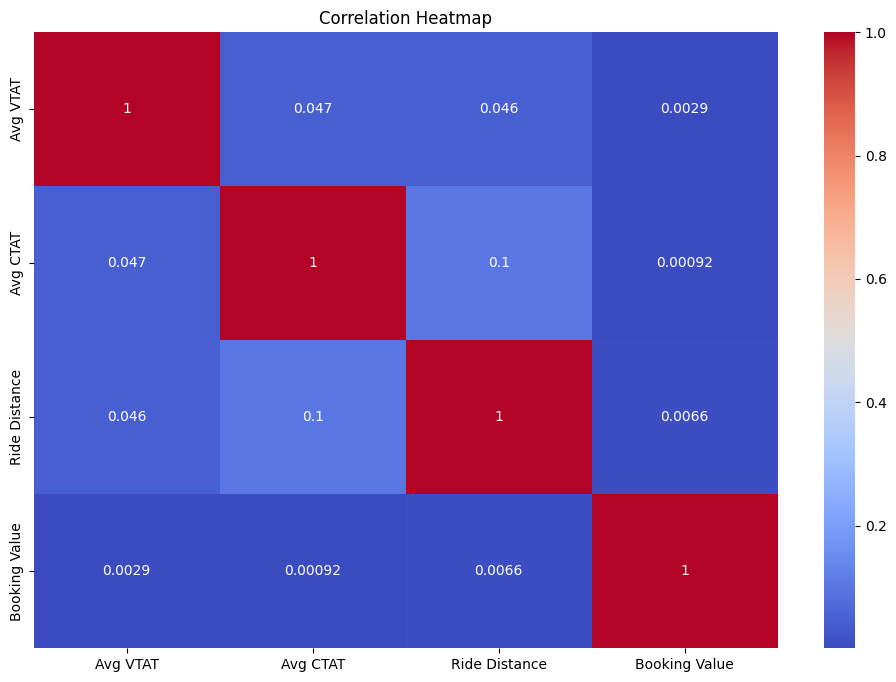

In [80]:
col_num =  ["Avg VTAT", "Avg CTAT", "Ride Distance", "Booking Value", "Book_Hour"]
plt.figure(figsize=(12, 8))
sns.heatmap(x_train_cardinal[col_num_cont].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

dari heatmap, tidak terlihat adanya korelasi antara kolom tersebut.

In [81]:
x_train_selection = x_train_cardinal.drop(["Book_Hour"], axis=1)
x_test_selection = x_test_cardinal.drop(["Book_Hour"], axis=1)
x_train_selection.head()

,Vehicle Type,Avg VTAT,Avg CTAT,Booking Value,Ride Distance
93686,Go Sedan,8.6,32.35,1274.0,20.38
70149,Go Mini,8.9,28.90,429.0,23.99
90104,Go Sedan,10.6,41.40,436.0,29.32
102032,Go Sedan,3.5,15.90,84.0,15.11
23444,Auto,5.7,25.10,1538.0,29.91


hasil selection disimpan pada variable baru yaitu ```x_train_selection``` dan ```x_test_selection```

## Handling Outliers

In [82]:
def outliers_checker(data, list_cols):
    '''
    Mengecek distribusi, skewness, batas atas/bawah, outlier, 
    serta menambahkan mean, median, std, min, max.
    '''

    # variable kosong
    result = []

    for col in list_cols:
        row = []

        # add nama kolom
        row.append(col)

        # hitung skewness
        skewness = data[col].skew()
        row.append(skewness)

        # check normalitas
        if np.abs(skewness) > 1:
            skew_cat = 'extreme skew'
        elif np.abs(skewness) > 0.5:
            skew_cat = 'skew'
        else:
            skew_cat = 'normal'
        row.append(skew_cat)

        # upper dan lower boundaries
        if skew_cat == 'normal':
            upper = data[col].mean() + 3 * data[col].std()
            lower = data[col].mean() - 3 * data[col].std()
        elif skew_cat == 'skew':
            iqr = data[col].quantile(0.75) - data[col].quantile(0.25)
            upper = data[col].quantile(0.75) + 1.5 * iqr
            lower = data[col].quantile(0.25) - 1.5 * iqr
        else:
            iqr = data[col].quantile(0.75) - data[col].quantile(0.25)
            upper = data[col].quantile(0.75) + 3 * iqr
            lower = data[col].quantile(0.25) - 3 * iqr

        # add upper and lower boundaries
        row.append(round(upper, 2))
        row.append(round(lower, 2))

        # check outliers exists or not
        if len(data.loc[(data[col] < lower) | (data[col] > upper)]) > 0:
            row.append('has outliers')
            row.append(round(len(data.loc[(data[col] < lower) | (data[col] > upper)]) / len(data) * 100, 2))
        else:
            row.append('no outlier')
            row.append(0.0)

        # tambahkan statistik tambahan
        row.append(round(data[col].mean(), 2))   # mean
        row.append(round(data[col].median(), 2)) # median
        row.append(round(data[col].std(), 2))    # std
        row.append(round(data[col].min(), 2))    # min
        row.append(round(data[col].max(), 2))    # max

        result.append(row)

    result = pd.DataFrame(result, columns=[
        'nama kolom', 'skewness', 'skewness category', 
        'upper boundary', 'lower boundary', 
        'outliers status', 'outlier pct (in %)',
        'mean', 'median', 'std', 'min', 'max'
    ])
    return result

buat function untuk melakukan validasi apakah kolom perlu dilakukan handling outliers

Penanganan Outlier

beberapa variable yang digunakan untuk menilai outlier : 
- Distribusi (skewness) → apakah distribusinya normal atau skewed. 
    - Batas umum: |skewness| < 0.5 ≈ normal, 0.5–1 = skew, >1 = extreme skew.
- Persentase outlier → apakah jumlahnya kecil (bisa di-retain) atau besar (perlu trimming/capping).
    - ```< 1%``` biasanya aman retain.
    - 1–5% bisa dipertimbangkan capping.
    - ```> 5%``` besar kemungkinan perlu capping atau trimming.

1. Trimming Outliers Dilakukan dengan menghapus nilai-nilai di luar batas tertentu. Cocok diterapkan jika terdapat nilai yang secara logika tidak masuk akal atau salah input, seperti umur 0 tahun.

2. Retaining Outliers Outlier dipertahankan jika nilai-nilainya masih dalam rentang yang masuk akal dan tidak terlalu jauh dari rata-rata. Misalnya, variabel pace dengan nilai antara 0–100 masih dapat dianggap valid.

3. Capping (Winsorizing) Digunakan ketika trimming tidak ideal dan retaining berisiko menurunkan performa model. Nilai-nilai ekstrem akan diubah ke batas bawah atau batas atas yang ditentukan, sehingga distribusi data menjadi lebih stabil. Dipakai jika terdapat data dengan nilai ekstrem dari batas bawah dan atas.

In [83]:
# checking distribution and upper, lower boundaries
list_cols_to_outlier = ["Avg VTAT", "Avg CTAT", "Ride Distance", "Booking Value"]

# check
outliers_checker(x_train_selection, list_cols_to_outlier)

,nama kolom,skewness,skewness category,upper boundary,lower boundary,outliers status,outlier pct (in %),mean,median,std,min,max
0,Avg VTAT,0.308846,normal,19.77,-2.87,has outliers,0.14,8.45,8.20,3.77,2.0,20.0
1,Avg CTAT,0.047690,normal,53.80,4.49,no outlier,0.00,29.15,28.90,8.22,10.0,45.0
2,Ride Distance,0.140293,normal,63.32,-14.10,no outlier,0.00,24.61,23.99,12.90,1.0,50.0
3,Booking Value,2.372392,extreme skew,1839.67,-916.00,has outliers,0.89,505.56,429.00,363.77,50.0,4277.0


1. Vehicle Type adalah kolom kategorikal numerik, jadi tidak perlu dihitung outlier

2. Avg VTAT, Avg CTAT, dan Ride Distance 
    - skewness di kategori normal, sehingga tidak perlu dilakukan handling outliers.

3. Booking Value, Outlier 9.87%, skewness 5.993600
    - skewness di kategory extreme skew, namun presentase outlier sangat sedikit 0.89%
    - terlihat perbedaan jauh antara Booking Value terbanyak dengan rata-rata. Max = 4277.0, rata-rata = 505.56.
    - dikarenakan presentase data sangat sedikit, maka tidak perlu dilakukan handling outliers

## Feature Scaling

In [84]:
scaler = StandardScaler()
col_num_cont_scaler = ["Avg VTAT", "Avg CTAT", "Ride Distance", "Booking Value"]

Avg VTAT, Avg CTAT_filled, Ride Distance_filled, dan Booking Value_filled adalah kolom numerik kontinu, maka kita gunakan StandartScaler untuk menormalkan data numerik agar memiliki rata-rata 0 dan standar deviasi 1

## Feature Encoding

In [85]:
ohe = OneHotEncoder(handle_unknown="ignore")
col_cat_ohe = ["Vehicle Type"]

Vehicle Type adalah kolom kategorial numerik, maka kita gunakan OneHotEncoder untuk mengubah variabel kategorikal menjadi bentuk numerik biner (0/1).

## FE Pipeline

In [86]:
num_pipe = Pipeline([("scaler", scaler)])
cat_pipe = Pipeline([("ohe", ohe)])

col_trans = ColumnTransformer([
    ("num", num_pipe, col_num_cont_scaler),
    ("cat", cat_pipe, col_cat_ohe)
])

Pipeline ini akan dibuat dengan ColumnTransformer : 
- num_pipe: untuk kolom numerik kontinu, dilakukan scaling dengan StandardScaler.
- cat_pipe: untuk kolom kategorikal, dilakukan encoding dengan OneHotEncoder.

Dengan pipeline ini, scaling dan encoding bisa dilakukan secara otomatis dan konsisten baik pada training maupun inference.

# 6. Model Definition

In [95]:
model_dectree = make_pipeline(
    col_trans, 
    DecisionTreeClassifier(random_state=7, class_weight="balanced")
    )
model_knn = make_pipeline(
    col_trans,
    KNeighborsClassifier()
)
model_svm = make_pipeline(
    col_trans,
    SVC(kernel="linear", class_weight="balanced", random_state=7)
)
model_rf = make_pipeline(
    col_trans,
    RandomForestClassifier(random_state=7, class_weight="balanced")
)

model_xgb = make_pipeline(
    col_trans,
    XGBClassifier(
        n_estimators=300, 
        learning_rate=0.1, 
        max_depth=5, 
        random_state=7, 
        scale_pos_weight=1
    )
)

### Decision Tree
Model Non-linear, berbasis aturan (rule-based). Membagi data secara rekursif berdasarkan threshold fitur untuk memaksimalkan pemisahan kelas. Dapat menangani hubungan non-linear & interaksi fitur. Hasil lebih mudah dijelaskan lewat diagram pohon
- Kelebihan:
    - Mampu menangkap hubungan non-linear dan interaksi antar fitur.
    - Tidak butuh scaling/normalisasi data.
    - Bisa menangani missing value (terbatas).
- Kekurangan:
    - Mudah overfitting jika tidak di-pruning.
    - Kurang interpretatif jika pohon terlalu besar.

### K-Nearest Neighbors (KNN)
Model berbasis instance-based learning. Prediksi kelas ditentukan oleh mayoritas label dari k tetangga terdekat (berdasarkan jarak, biasanya Euclidean).
- Kelebihan:
    - Sederhana & intuitif.
    - Tidak perlu asumsi distribusi data.
    - Bisa menangkap pola non-linear.
- Kekurangan:
    - Lambat pada dataset besar (harus hitung jarak ke semua titik).
    - Sensitif terhadap scaling data (butuh normalisasi).
    - Pemilihan k sangat berpengaruh.

### Support Vector Machine (SVM)
Model berbasis margin. Mencari hyperplane yang memaksimalkan jarak (margin) antara kelas. Bisa diperluas dengan kernel trick untuk hubungan non-linear.
- Kelebihan:
    - Bagus untuk data high-dimensional.
    - Bisa menangkap pola non-linear (dengan kernel).
    - Relatif robust terhadap outlier.
- Kekurangan:
    - Training lambat di dataset besar.
    - Sulit dituning (C, gamma, kernel).
    - Hasil lebih sulit dijelaskan ke non-teknis.

### Random Forest
Ensemble dari banyak Decision Tree, hasil voting (klasifikasi) atau rata-rata (regresi). Membantu mengurangi overfitting yang terjadi pada single tree.
- Kelebihan:
    - Lebih stabil & generalisasi lebih baik dibanding single tree.
    - Menangani non-linear & interaksi fitur.
    - Memberikan feature importance.
- Kekurangan:
    - Lebih lambat daripada single tree.
    - Interpretabilitas berkurang (sulit divisualkan semua pohon).

### Boosting (contoh: Gradient Boosting / XGBoost / AdaBoost)
Metode ensemble sequential: membangun model secara bertahap, tiap model baru memperbaiki kesalahan model sebelumnya.
- Kelebihan:
    - Sering memberi performa sangat baik (state-of-the-art di banyak kompetisi).
    - Lebih kuat terhadap overfitting dibanding single tree.
    - Bisa meng-handle interaksi kompleks antar fitur.
- Kekurangan:
    - Training lebih lambat.
    - Banyak hyperparameter yang harus dituning.
    - Interpretasi lebih sulit dibanding single tree.

kita akan menggunakan XGBoost karena lebih cocok untuk dataset yang besar, dan lebih kuat dari Gradient Boosting

dengan ```class_weight="balanced"``` model otomatis menghitung bobot tiap kelas, sehingga kelas minoritas akan diberi bobot yang lebih tinggi.

# 7. Model Training

In [53]:
# Train the model
model_dectree.fit(x_train_selection, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['Avg VTAT', 'Avg CTAT',
                                                   'Ride Distance',
                                                   'Booking Value']),
                                                 ('cat',
                                                  Pipeline(steps=[('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Vehicle Type'])])),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(class_weight='balanced',
                                        random_state=7))])

In [54]:
# Train the model
model_knn.fit(x_train_selection, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['Avg VTAT', 'Avg CTAT',
                                                   'Ride Distance',
                                                   'Booking Value']),
                                                 ('cat',
                                                  Pipeline(steps=[('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Vehicle Type'])])),
                ('kneighborsclassifier', KNeighborsClassifier())])

In [99]:
# Train the model
model_svm.fit(x_train_selection, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['Avg VTAT', 'Avg CTAT',
                                                   'Ride Distance',
                                                   'Booking Value']),
                                                 ('cat',
                                                  Pipeline(steps=[('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Vehicle Type'])])),
                ('svc',
                 SVC(class_weight='balanced', kernel='linear',
                     random_state=7))])

In [55]:
# Train the model
model_rf.fit(x_train_selection, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['Avg VTAT', 'Avg CTAT',
                                                   'Ride Distance',
                                                   'Booking Value']),
                                                 ('cat',
                                                  Pipeline(steps=[('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Vehicle Type'])])),
                ('randomforestclassifier',
                 RandomForestClassifier(class_weight='balanced',
                                        random_state=7))])

In [96]:
# Train the model
model_xgb.fit(x_train_selection, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['Avg VTAT', 'Avg CTAT',
                                                   'Ride Distance',
                                                   'Booking Value']),
                                                 ('cat',
                                                  Pipeline(steps=[('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Vehicle Type'])])),
                ('xgbclassifier',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsampl...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=0.1,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=5, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=300, n_jobs=None,
                               num_parallel_tree=None, random_state=7, ...))])

Train LogistikRefression dan DesicionTreeClassifier

### Cross Validation

In [57]:
# cross validate Decision Tree
result_dectree = cross_validate(model_dectree, x_train_selection, y_train,
                               scoring= 'recall',
                               cv = 5, return_train_score= True)
pd.DataFrame(result_dectree)

,fit_time,score_time,test_score,train_score
0,0.788750,0.016654,0.610058,1.0
1,0.783128,0.034107,0.616781,1.0
2,0.765624,0.017638,0.612478,1.0
3,0.766539,0.016593,0.617453,1.0
4,0.816362,0.033473,0.618881,1.0


In [58]:
# cross validate KNN
result_knn = cross_validate(model_knn, x_train_selection, y_train,
                               scoring= 'recall',
                               cv = 5, return_train_score= True)
pd.DataFrame(result_knn)

,fit_time,score_time,test_score,train_score
0,0.483432,1.782108,0.555600,0.666353
1,0.286003,1.699029,0.550760,0.669278
2,0.247567,1.733187,0.552911,0.665311
3,0.235822,2.205173,0.547398,0.670286
4,0.241226,1.816562,0.550968,0.667104


In [100]:
# cross validate SVM
result_svm = cross_validate(model_svm, x_train_selection, y_train,
                               scoring= 'recall',
                               cv = 5, return_train_score= True)
pd.DataFrame(result_svm)

,fit_time,score_time,test_score,train_score
0,375.236042,27.399190,0.609789,0.608229
1,378.353902,27.338247,0.619874,0.612869
2,369.087250,27.399235,0.600780,0.610717
3,367.474353,27.261852,0.614226,0.618046
4,386.116942,27.448451,0.616998,0.614125


In [61]:
# cross validate Random Forest
result_rf = cross_validate(model_rf, x_train_selection, y_train,
                               scoring= 'recall',
                               cv = 5, return_train_score= True)
pd.DataFrame(result_rf)

,fit_time,score_time,test_score,train_score
0,15.026821,0.490586,0.558827,0.999899
1,14.924428,0.516006,0.566626,0.999899
2,13.738772,0.485049,0.570257,0.999966
3,14.368064,0.480960,0.560576,0.999933
4,13.793125,0.514375,0.558230,0.999832


In [97]:
# cross validate Boosting
result_xgb = cross_validate(model_xgb, x_train_selection, y_train,
                               scoring= 'recall',
                               cv = 5, return_train_score= True)
pd.DataFrame(result_xgb)

,fit_time,score_time,test_score,train_score
0,0.741137,0.045025,0.572677,0.594413
1,0.706748,0.057019,0.578459,0.591488
2,0.792210,0.043756,0.572677,0.588429
3,0.680088,0.043600,0.575501,0.591152
4,0.651498,0.046315,0.566703,0.588409


untuk Cross Validation, kita gunakan Recall karena lebih berbahaya jika prediksi menjadi false negatif (terdeteksi tidak cancel, tapi sebenarnya cancel) dibandingkan false positif (terdeteksi cancel, tapi sebenarnya tidak cancel).

#### Decision Tree Validation
- Train = 1, Test = 0.61. Model overfitting, pohon tumbuh terlalu dalam (mampu mengklasifikasikan semua data training dengan sempurna).
- Perlu hypertunning:
    - max_depth, min_samples_split, min_samples_leaf.
- fit_time ≈ 0.8–1.0 detik per fold → cukup cepat, tidak ada masalah performa runtime.

#### K-Nearest Neighbors (KNN) Validation
- Train recall ≈ 0.66 → tidak overfit, performa train & test mirip.
- Test recall ≈ 0.55 → cukup rendah, kalah dibanding Decision Tree dan SVM.
- fit_time < 0.5 detik → training cepat.
- score_time ≈ 2–3.5 detik → prediksi lambat, karena KNN harus hitung jarak ke semua titik training.

Kesimpulan:
KNN tidak overfit, tapi recall rendah. Selain itu, prediksi lambat di dataset besar (111k rows). Kurang cocok untuk produksi.

#### Support Vector Machine (SVM) Validation
- Train recall ≈ 0.61, Test recall ≈ 0.61 → generalisasi stabil, tidak overfit.
- fit_time sangat lama (367-380 detik/fold) & score_time juga besar (27 detik).
- Recall lebih tinggi daripada KNN/Random Forest/XGB, tapi biayanya mahal sekali.

Kesimpulan:
Performa recall bagus & stabil, tapi sangat lambat di dataset besar (111k rows). Cocok hanya untuk dataset kecil atau perlu eksperimen baseline.

#### Random Forest Validation
- Train recall ≈ 0.99 → jelas overfit (hapal data train).
- Test recall ≈ 0.56 → rendah, malah mirip KNN, meski train hampir sempurna.
- fit_time ≈ 15 detik/fold → lumayan lama, tapi jauh lebih cepat dari SVM.
- score_time ≈ 0.5 detik → prediksi cepat.

Kesimpulan:
Overfit parah, recall test malah rendah. Random Forest default tidak cocok → perlu tuning (misalnya max_depth, min_samples_leaf) untuk mengurangi overfitting.

#### Boosting (XGBoost) Validation
- Train recall ≈ 0.59, Test recall ≈ 0.57 → seimbang, tidak overfit.
- fit_time < 1 detik, score_time < 0.06 detik → paling efisien.
- Recall mirip Random Forest, tapi lebih stabil (tidak overfit) dan runtime jauh lebih cepat.

Kesimpulan:
XGBoost stabil, cepat, dan tidak overfit. Walau recall test masih sekitar 0.57 (lebih rendah dari SVM 0.61), secara efisiensi + generalisasi, XGBoost lebih praktis dipakai.

# 8. Model Evaluation

In [104]:
def evaluate_Model(y_train_pred, y_test_pred, y_train_proba, y_test_proba):
    # calculate metrics
    recall_train = recall_score(y_train, y_train_pred)
    precision_train = precision_score(y_train, y_train_pred)
    print("Train Set Metrics:")
    print("Recall   :", recall_train)
    print("Precision:", precision_train)
    if (y_train_proba is None) : 
        roc_auc_train = None
    else:
        roc_auc_train = roc_auc_score(y_train, y_train_proba)
    print(f"ROC-AUC  : {roc_auc_train}" )

    recall_test = recall_score(y_test, y_test_pred)
    precision_test = precision_score(y_test, y_test_pred)
    print("\nTest Set Metrics:")
    print("Recall   :", recall_test)
    print("Precision:", precision_test)
    if (y_test_proba is None) : 
        roc_auc_test = None
    else:
        roc_auc_test = roc_auc_score(y_test, y_test_proba)
    print(f"ROC-AUC  : {roc_auc_test}" )

    metrics_before = {
        "Recall_Train": recall_train,
        "Precision_Train": precision_train,
        "ROC_AUC_Train": roc_auc_train,
        "Recall_Test": recall_test,
        "Precision_Test": precision_test,
        "ROC_AUC_Test": roc_auc_test
    }
    return metrics_before

Teknik evaluasi (metrics) yang dipakai

1. Recall :
    - Mengukur seberapa banyak prediksi positif yang benar-benar positif.
    - Cocok ketika kesalahan negatif palsu (false negative) lebih kritis.
    - Sangat penting kalau tujuan bisnis, penting untuk tahu jika user diprediksikan tidak cancel booking tetapi sebenarnya cancel booking. 
2. Precision :
    - Mengukur seberapa banyak prediksi positif yang benar-benar positif.
    - Cocok ketika kesalahan positif palsu (false positive) lebih kritis.
2. ROC-AUC : 
    - Mengukur kemampuan model membedakan kelas positif dan negatif secara keseluruhan.
    - Semakin tinggi nilai AUC, semakin baik model dalam membedakan kelas.


### Evaluasi Logistic Regression

Recall 
train : 0.099, test : 0.100
- Model hanya bisa menangkap ~10% transaksi yang benar-benar cancel. Sangat rendah.

Precision
train : 0.523, test : 0.525
- ketika model memprediksi cancel, hanya 52% yang benar-benar cancel. Cukup lumayan, tapi karena recall rendah, model jadi hampir tidak berguna untuk deteksi cancel.

ROC-AUC 
train : 0.617, test 0.620
- hanya sedikit lebih baik dari Precision. Indikasi model tidak bisa membedakan pola cancel vs selesai dengan baik.

### Evaluasi Decision Tree

In [88]:
# predictions
y_train_pred = model_dectree.predict(x_train_selection)
y_test_pred  = model_dectree.predict(x_test_selection)

# predicted probabilities (for ROC-AUC)
y_train_proba = model_dectree.predict_proba(x_train_selection)[:, 1]
y_test_proba  = model_dectree.predict_proba(x_test_selection)[:, 1]

metrics_dectree_before = evaluate_Model(y_train_pred, y_test_pred, y_train_proba, y_test_proba)

Train Set Metrics:
Recall   : 1.0
Precision: 0.9997580189820665
ROC-AUC  : 0.9999999853636565

Test Set Metrics:
Recall   : 0.6276298840704165
Precision: 0.616252107925801
ROC-AUC  : 0.7158775880423277


Train:
- Recall = 1.0, Precision = ~1.0, ROC-AUC ≈ 1.0 → model hapal data train sempurna (overfit).

Test:
- Recall = 0.63, Precision = 0.62, ROC-AUC = 0.72 → performa drop jauh di data baru.

Analisis:
- Overfitting parah: performa training sempurna, tapi test jauh lebih rendah.
- Masih bisa mendeteksi 63% kasus positif, tapi diskriminasi antar kelas (ROC-AUC 0.72) cukup rendah.

Kelebihan:
- Mudah diinterpretasi, cepat dilatih.
- Menangkap hubungan non-linear.

Kekurangan:
- Mudah overfit.
- Generalisasi lemah tanpa pruning/tuning.

### Evaluasi K-Nearest Neighbors (KNN)

In [87]:
# predictions
y_train_pred = model_knn.predict(x_train_selection)
y_test_pred  = model_knn.predict(x_test_selection)

# predicted probabilities (for ROC-AUC)
y_train_proba = model_knn.predict_proba(x_train_selection)[:, 1]
y_test_proba  = model_knn.predict_proba(x_test_selection)[:, 1]

metrics_knn_before = evaluate_Model(y_train_pred, y_test_pred, y_train_proba, y_test_proba)

Train Set Metrics:
Recall   : 0.6688629518072289
Precision: 0.7712416273877449
ROC-AUC  : 0.897015641564727

Test Set Metrics:
Recall   : 0.556784027479605
Precision: 0.6461136023916293
ROC-AUC  : 0.7790165958999806


Train:
- Recall = 0.67, Precision = 0.77, ROC-AUC = 0.90 → cukup baik di train.

Test:
- Recall = 0.56, Precision = 0.65, ROC-AUC = 0.78 → performa menurun, tapi tidak separah Decision Tree.

Analisis:
- Tidak overfit, tapi recall lebih rendah dibanding Decision Tree.
- ROC-AUC test 0.78 → lumayan, masih bisa membedakan kelas, tapi tidak tinggi.
- Prediksi lambat pada dataset besar (karena perlu hitung jarak ke semua sampel train).

Kelebihan:
- Sederhana, tidak butuh training berat.
- Bagus untuk data kecil/medium.

Kekurangan:
- Prediksi lambat pada dataset besar (111k rows).
- Sensitif ke scaling & outlier.
- Recall lebih rendah dari model lain.

### Evaluasi Support Vector Machine (SVM)

In [105]:
# predictions
y_train_pred = model_svm.predict(x_train_selection)
y_test_pred  = model_svm.predict(x_test_selection)

metrics_svm_before = evaluate_Model(y_train_pred, y_test_pred, None, None)

Train Set Metrics:
Recall   : 0.6138661790017211
Precision: 0.40561528209684583
ROC-AUC  : None

Test Set Metrics:
Recall   : 0.6100257621296694
Precision: 0.40826149425287356
ROC-AUC  : None


Train:
- Recall = 0.61, Precision = 0.41, ROC-AUC = None (karena SVC default tidak output probabilitas).

Test:
- Recall = 0.61, Precision = 0.41, ROC-AUC = None.

Analisis:
- Generalisasi sangat stabil (train ≈ test).
- Recall lumayan (0.61), tapi precision rendah (0.41) → banyak false positives.
- Waktu training sangat lama pada dataset besar.

Kelebihan:
- Stabil, tidak overfit.
- Cocok untuk data high-dimensional.

Kekurangan:
- Sangat lambat pada dataset besar.
- Precision rendah → banyak false alarm.
- Sulit dituning (C, kernel, gamma).

### Evaluasi Random Forest

In [90]:
# predictions
y_train_pred = model_rf.predict(x_train_selection)
y_test_pred  = model_rf.predict(x_test_selection)

# predicted probabilities (for ROC-AUC)
y_train_proba = model_rf.predict_proba(x_train_selection)[:, 1]
y_test_proba  = model_rf.predict_proba(x_test_selection)[:, 1]

metrics_rf_before = evaluate_Model(y_train_pred, y_test_pred, y_train_proba, y_test_proba)

Train Set Metrics:
Recall   : 0.9998386402753873
Precision: 0.9998655299464809
ROC-AUC  : 0.9999996452945386

Test Set Metrics:
Recall   : 0.5775010734220696
Precision: 0.7236045729657028
ROC-AUC  : 0.8504093091662573


Train:
- Recall ≈ 1.0, Precision ≈ 1.0, ROC-AUC ≈ 1.0 → hapal data train (overfit).

Test:
- Recall = 0.58, Precision = 0.72, ROC-AUC = 0.85 → generalisasi lebih baik dari Decision Tree, ROC-AUC tinggi.

Analisis:
- Masih ada overfit, tapi lebih stabil dibanding Decision Tree.
- ROC-AUC test 0.85 → kemampuan diskriminasi antar kelas sangat baik.
- Recall tidak terlalu tinggi (0.58), tapi precision relatif bagus (0.72).

Kelebihan:
- Lebih stabil daripada Decision Tree tunggal.
- Bisa memberi feature importance.
- Generalisasi cukup bagus.

Kekurangan:
- Tetap overfit jika tidak dituning.
- Training lebih lambat dari Decision Tree.

### Evaluasi Boosting (XGBoost)

In [98]:
# predictions
y_train_pred = model_xgb.predict(x_train_selection)
y_test_pred  = model_xgb.predict(x_test_selection)

# predicted probabilities (for ROC-AUC)
y_train_proba = model_xgb.predict_proba(x_train_selection)[:, 1]
y_test_proba  = model_xgb.predict_proba(x_test_selection)[:, 1]

metrics_xgb_before = evaluate_Model(y_train_pred, y_test_pred, y_train_proba, y_test_proba)

Train Set Metrics:
Recall   : 0.5874569707401033
Precision: 0.7400481078700409
ROC-AUC  : 0.8656528262549538

Test Set Metrics:
Recall   : 0.5787891799055389
Precision: 0.7251210328133405
ROC-AUC  : 0.8525524335259238


Analisis:
- Model paling seimbang: recall cukup (0.58), precision cukup tinggi (0.73), ROC-AUC bagus (0.85).
- Tidak overfit, generalisasi stabil.
- Runtime relatif cepat dibanding Random Forest atau SVM.

Kelebihan:
- Generalisasi kuat.
- Cepat & efisien, cocok untuk dataset besar.
- Sering outperform model lain di data tabular.

Kekurangan:
- Banyak hyperparameter (butuh tuning).
- Interpretasi lebih sulit dibanding Decision Tree.

Kesimpulan & Rekomendasi
- Decision Tree → overfit, performa test tidak stabil.
- KNN → stabil tapi recall rendah, prediksi lambat → tidak cocok untuk dataset besar.
- SVM → stabil recall (0.61) tapi precision rendah & training lambat → kurang praktis.
- Random Forest → recall sedang (0.58), precision bagus (0.72), ROC-AUC tinggi (0.85) → cukup solid.
- XGBoost → paling seimbang, stabil, recall oke (0.58), precision bagus (0.73), ROC-AUC tinggi (0.85).

Rekomendasi:
Gunakan XGBoost sebagai model utama karena:
- Generalisasi stabil.
- ROC-AUC tinggi (mampu membedakan kelas dengan baik).
- Recall & precision seimbang.
- Runtime efisien untuk dataset besar.
- Random Forest bisa dipakai sebagai pembanding kedua, sementara Decision Tree, KNN, dan SVM kurang cocok untuk deployment.

# 9. Hyperparameter Tuning

## i. Hyperparameter Tuning - Training

Untuk Hyperparameter Tuning pada model XGBoost akan dilakukan menggunakan Grid Search

GridSearch :
- Kelebihan : 
    - Sangat sistematis → pasti mengeksplor semua kombinasi.
    - Bagus untuk parameter space kecil.
- Kekurangan:
    - Boros waktu & komputasi kalau kombinasi parameter banyak (eksplosif).
    - Bisa menghabiskan waktu lama untuk dataset besar.

### Tuning XGBoost

In [ ]:
# parameter grid untuk XGBoost
param_grid_xgb = {
    "xgbclassifier__n_estimators": [100, 200, 300],       # jumlah pohon boosting
    "xgbclassifier__max_depth": [3, 5, 7, 10],            # kedalaman pohon
    "xgbclassifier__learning_rate": [0.01, 0.05, 0.1],    # step size shrinkage
    "xgbclassifier__subsample": [0.7, 0.8, 1.0],          # rasio data yang digunakan di tiap pohon
    "xgbclassifier__scale_pos_weight": [1, 3, 5]          # penting jika kelas tidak seimbang
}

# Grid Search dengan 5-fold cross-validation
grid_search_xgb = GridSearchCV(
    estimator=model_xgb,         # pipeline yang berisi XGBClassifier
    param_grid=param_grid_xgb,
    cv=5,
    scoring="roc_auc",           # atau "recall" jika fokus recall
    n_jobs=-1,
    verbose=2
)

Penjelasan singkat tiap parameter
- n_estimators → jumlah pohon (semakin banyak bisa lebih akurat tapi lebih lambat).
- max_depth → batasi kedalaman pohon (terlalu besar = overfit).
- learning_rate → kontrol kontribusi tiap pohon (kecil = butuh lebih banyak pohon tapi lebih stabil).
- subsample → sampling baris tiap pohon, <1 bisa mencegah overfit.
- colsample_bytree → sampling kolom fitur tiap pohon, <1 juga bisa mencegah overfit.
- gamma → threshold minimal penurunan loss untuk split baru (lebih besar = pohon lebih konservatif).
- min_child_weight → minimal jumlah sampel di node anak, cegah pohon tumbuh terlalu detail.
- scale_pos_weight → atur jika dataset imbalance (misal jumlah non-cancel jauh lebih banyak dari cancel).

In [118]:
# fit ke data train
grid_search_xgb.fit(x_train_selection, y_train)

Fitting 5 folds for each of 324 candidates, totalling 1620 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('scaler',
                                                                                          StandardScaler())]),
                                                                         ['Avg '
                                                                          'VTAT',
                                                                          'Avg '
                                                                          'CTAT',
                                                                          'Ride '
                                                                          'Distance',
                                                                          'Booking '
                                                                          'Value']),
                                                                        ('cat',
                                                                         Pipeline(steps=[('ohe',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['Vehicle '
                                                                          'Type'])])),
                                       ('xgbclassifier',
                                        XGBClassifier(base_score=Non...
                                                      multi_strategy=None,
                                                      n_estimators=300,
                                                      n_jobs=None,
                                                      num_parallel_tree=None,
                                                      random_state=7, ...))]),
             n_jobs=-1,
             param_grid={'xgbclassifier__learning_rate': [0.01, 0.05, 0.1],
                         'xgbclassifier__max_depth': [3, 5, 7, 10],
                         'xgbclassifier__n_estimators': [100, 200, 300],
                         'xgbclassifier__scale_pos_weight': [1, 3, 5],
                         'xgbclassifier__subsample': [0.7, 0.8, 1.0]},
             scoring='roc_auc', verbose=2)

kita coba lakukan tuning XGBoost

In [119]:
# cek hasil
cv_result = pd.DataFrame(grid_search_xgb.cv_results_)
cv_result.sort_values(by= 'rank_test_score').head(3)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_xgbclassifier__learning_rate,param_xgbclassifier__max_depth,param_xgbclassifier__n_estimators,param_xgbclassifier__scale_pos_weight,param_xgbclassifier__subsample,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
211,23.627655,0.466326,1.738603,0.194493,0.05,10,300,3,0.8,"{'xgbclassifier__learning_rate': 0.05, 'xgbcla...",0.848064,0.851479,0.856628,0.852172,0.852662,0.852201,0.002737,1
214,23.797698,0.969024,1.686918,0.094617,0.05,10,300,5,0.8,"{'xgbclassifier__learning_rate': 0.05, 'xgbcla...",0.848881,0.851632,0.856483,0.851321,0.851798,0.852023,0.002468,2
213,23.840702,0.813351,1.544322,0.074314,0.05,10,300,5,0.7,"{'xgbclassifier__learning_rate': 0.05, 'xgbcla...",0.847494,0.851536,0.856365,0.851358,0.851671,0.851685,0.002814,3


dari hasil tuning didapatkan nilai paling bagus ada pada kombinasi `'learning_rate': 0.05`, `'max_depth': '10'`,  `'n_estimators': '300'`, `'scale_pos_weight': '3'`, `'subsample': '0.8'`

In [120]:
# fit hasil tuning
best_model_xgb = grid_search_xgb.best_estimator_
best_model_xgb

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['Avg VTAT', 'Avg CTAT',
                                                   'Ride Distance',
                                                   'Booking Value']),
                                                 ('cat',
                                                  Pipeline(steps=[('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Vehicle Type'])])),
                ('xgbclassifier',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsampl...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=0.05,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=10, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=300, n_jobs=None,
                               num_parallel_tree=None, random_state=7, ...))])

## ii. Hyperparameter Tuning - Evaluation

### Evaluation XGBoost

In [157]:
# predictions
y_train_pred = best_model_xgb.predict(x_train_selection)
y_test_pred  = best_model_xgb.predict(x_test_selection)

# predicted probabilities (for ROC-AUC)
y_train_proba = best_model_xgb.predict_proba(x_train_selection)[:, 1]
y_test_proba  = best_model_xgb.predict_proba(x_test_selection)[:, 1]

metrics_xgb_after = evaluate_Model(y_train_pred, y_test_pred, y_train_proba, y_test_proba)

perform_xgb_eval = pd.DataFrame({
    "Model": ["Recall Train", "Recall Test", "Precision Train", "Precision Test", "ROC_AUC Train", "ROC_AUC Test"],
    "Before": [metrics_xgb_before['Recall_Train'], metrics_xgb_before['Recall_Test'], metrics_xgb_before['Precision_Train'], metrics_xgb_before['Precision_Test'], metrics_xgb_before['ROC_AUC_Train'], metrics_xgb_before['ROC_AUC_Test']],
    "After" : [metrics_xgb_after['Recall_Train'], metrics_xgb_after['Recall_Test'], metrics_xgb_after['Precision_Train'], metrics_xgb_after['Precision_Test'], metrics_xgb_after['ROC_AUC_Train'], metrics_xgb_after['ROC_AUC_Test']],
})


Train Set Metrics:
Recall   : 0.9311800774526678
Precision: 0.6317047361891557
ROC-AUC  : 0.9174767296159636

Test Set Metrics:
Recall   : 0.8390940317732932
Precision: 0.5820551005212211
ROC-AUC  : 0.856746395325776


### Hasil Evaluasi

Train Set:
- Recall = 0.93 (sangat tinggi, hampir semua kasus positif terdeteksi)
- Precision = 0.63 (masih cukup baik, meski ada false positives).
- ROC-AUC = 0.92 (sangat baik, model bisa membedakan kelas dengan baik).

Test Set:
- Recall = 0.84 (juga tinggi, turun sedikit dari train tapi tetap bagus).
- Precision = 0.58 (sedikit lebih rendah dari train).
- RROC-AUC = 0.86 (masih konsisten dengan train).

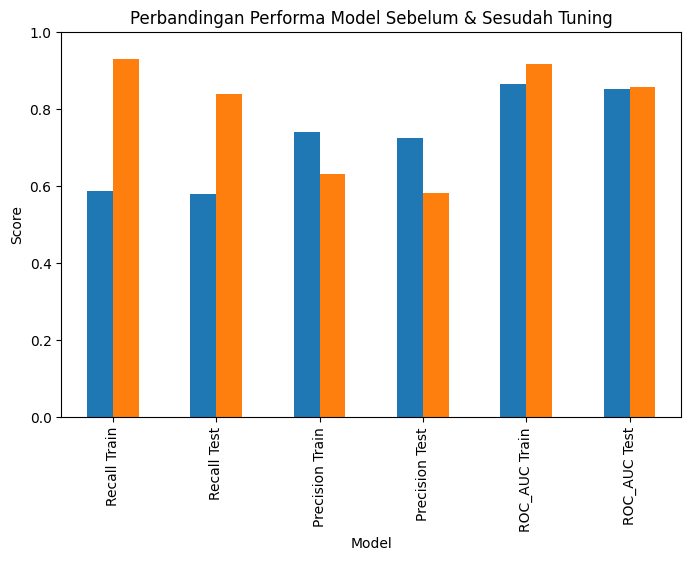

In [162]:
perform_xgb_eval.set_index("Model")[["Before","After"]].plot(kind="bar", figsize=(8,5), legend=False)
plt.title("Perbandingan Performa Model Sebelum & Sesudah Tuning")
plt.ylabel("Score")
plt.ylim(0,1)
plt.show()

### Analisa

Peningkatan Recall
- Recall naik di train (0.59 → 0.93) dan test (0.58 → 0.84).
- Artinya model efektif untuk deteksi kasus positif (cancel booking).

Precision Moderat
- Precision 0.58–0.63 → masih banyak false positives (nasabah diprediksi cancel padahal tidak).
- Ini trade-off wajar ketika recall diprioritaskan.

Generalization Stabil
- Train ROC-AUC 0.92 vs Test ROC-AUC 0.86 → gap kecil → tidak overfit parah.
- Train Recall 93% vs Test Recall 84% → perbedaan wajar, model generalisasi dengan baik.

### Kelebihan XGBoost setelah tuning
- Recall sangat tinggi (84% di test) → hampir semua kasus positif berhasil ditangkap. Cocok jika bisnis ingin mengurangi risiko cancel.
- ROC-AUC tinggi (0.86–0.92) → model sangat baik membedakan kelas.
- Tidak overfit signifikan → train dan test konsisten.
- Lebih baik dari tuning sebelumnya → recall meningkat drastis tanpa kehilangan terlalu banyak precision.

### Kekurangan XGBoost setelah tuning
- Precision hanya 0.58 → cukup banyak false positives → bisa membuat sistem over-alert (terlalu banyak nasabah diprediksi cancel padahal tidak).
- Trade-off recall vs precision → tergantung kebutuhan bisnis, jika terlalu banyak false positives bisa mengganggu customer experience.
- Model lebih kompleks → interpretasi lebih sulit, tidak sejelas Decision Tree.

## iii. Best Model Desicion

Kita putuskan untuk menggunakan XGBoost karena :

1. Kinerja terbaik secara keseluruhan
- Recall test tinggi (84%) → model sangat baik dalam mendeteksi kasus positif (misalnya cancel booking).
- ROC-AUC 0.86 → kemampuan diskriminasi antar kelas sangat baik.
- Performanya konsisten antara train & test → generalisasi bagus.

2. Seimbang antara Recall & Precision
- Precision test 0.58 masih cukup baik, artinya prediksi positif tidak terlalu banyak salah.
- Trade-off recall–precision lebih stabil dibanding Decision Tree (overfit) atau SVM (precision rendah).

3. Tidak Overfit 
- Gap antara train (Recall 93%, ROC-AUC 0.92) dan test (Recall 84%, ROC-AUC 0.86) relatif kecil.
- Menunjukkan model tidak sekadar menghapal data training, tapi bisa generalisasi dengan baik.

4. Lebih unggul daripada model lain
- Decision Tree & Random Forest → overfit berat, meski recall tinggi di train, performa test turun drastis.
- KNN → recall rendah (~0.55), prediksi lambat di dataset besar.
- SVM Linear → stabil, tapi precision sangat rendah (~0.40) dan training super lama di dataset besar (111k rows).
- XGBoost → cepat, stabil, performa recall & ROC-AUC konsisten.

5. Efisiensi & Skalabilitas
- XGBoost dirancang untuk dataset besar → training dan prediksi jauh lebih cepat dibanding SVM atau KNN.
- Bisa dituning lebih fleksibel dengan hyperparameter (subsample, colsample, scale_pos_weight, dll).

6. Relevan untuk kebutuhan bisnis
- Dalam kasus prediksi cancel booking, recall lebih penting (jangan sampai banyak kasus cancel lolos).
- XGBoost memberikan recall tinggi tanpa mengorbankan precision terlalu banyak.

# 9. Model Saving

In [ ]:
# Save the Files

with open('deployment\src\model_akhir.pkl', 'wb') as file_1:
  pickle.dump(best_model_xgb, file_1)

# 10. Model Inferencing

Untuk inferencing akan dikerjakan pada P1M2_jyotis_sugata_inf.ipynb

# 11. Pengambilan Kesimpulan

### Analisa dan Kesimpulan Exploratory Data Analysis (EDA)

#### 1. Analisa Lokasi Penjemputan dan Pemberhentian
- **Tidak ditemukan korelasi signifikan** antara lokasi penjemputan/pemberhentian dengan status "No Driver Found".
- Namun, terdapat **beberapa lokasi pickup dan drop tertentu** yang memiliki proporsi "No Driver Found" dan cancel rate tertinggi.
- **Rekomendasi:** Manajemen dapat menambah armada di lokasi-lokasi tersebut untuk mengurangi risiko gagal booking.

#### 2. Analisa Pembatalan Berdasarkan Lokasi
- **Cancel rate** bervariasi antar lokasi pickup dan drop, namun secara umum tidak ada lokasi yang sangat dominan.
- **Target encoding** pada lokasi membantu mengidentifikasi area rawan pembatalan.

#### 3. Analisa Jenis Kendaraan (Vehicle Type)
- **Tidak ada hubungan signifikan** antara jenis kendaraan dengan kemungkinan booking dibatalkan atau tidak selesai.
- Cancel rate antar vehicle type hampir seragam (~32–34%).
- **Rekomendasi:** Fokus analisa ke faktor lain, seperti waktu booking atau lokasi.

#### 4. Analisa Waktu Booking (Jam)
- **Cancel rate stabil** di kisaran 32–34% sepanjang hari, tidak ada jam tertentu yang menonjol.
- Volume booking tertinggi pada jam sibuk (pagi dan sore), sehingga jumlah absolut pembatalan lebih banyak di jam tersebut.
- **Rekomendasi:** Strategi penambahan driver lebih efektif difokuskan pada jam dengan volume tinggi.

#### 5. Korelasi Fitur
- Korelasi statistik menunjukkan fitur numerik seperti waktu tunggu, jarak tempuh, dan booking value memiliki pengaruh terhadap target, namun tidak ada fitur yang sangat dominan.
- Fitur kategorikal seperti vehicle type dan jam booking tidak berkorelasi signifikan dengan pembatalan.

#### 6. Penanganan Data
- **Missing value** diisi dengan rata-rata/median berdasarkan kombinasi lokasi, sehingga data tetap representatif.
- **Outlier** dianalisis dan diputuskan untuk dipertahankan karena proporsinya kecil dan masih masuk akal.

#### **Kesimpulan EDA**
- Tidak ada satu faktor tunggal yang sangat dominan menyebabkan pembatalan, namun kombinasi lokasi, waktu tunggu, dan jarak tempuh tetap relevan untuk prediksi.
- Cancel rate cenderung seragam di berbagai kategori, sehingga strategi bisnis perlu bersifat menyeluruh, bukan hanya fokus pada satu faktor.
- Hasil EDA mendukung pemilihan fitur yang digunakan dalam modeling dan memastikan tidak ada data leakage atau bias signifikan dalam data.

### Analisa Hasil Pengambilan Kesimpulan Modeling

1. Evaluasi Model
Berbagai model diuji (Decision Tree, KNN, SVM, Random Forest, XGBoost) dengan metrik utama recall dan ROC-AUC, sesuai kebutuhan bisnis untuk meminimalkan False Negative (kasus cancel yang tidak terdeteksi). Analisis performa dilakukan pada data train dan test untuk menghindari overfitting. Kita gunakan recall mengevaluasi model dengan berfokus pada error False Negative.

2. Pemilihan Model Terbaik Berdasarkan Kebutuhan Bisnis
XGBoost dipilih sebagai model akhir karena:
- Recall tinggi (84% pada data test) → mampu mendeteksi sebagian besar kasus pembatalan.
- ROC-AUC tinggi (0.86) → model mampu membedakan kelas dengan baik.
- Generalization baik → gap performa train-test kecil, tidak overfit.
- Efisien dan scalable untuk dataset besar.
- Trade-off recall–precision masih dalam batas wajar, sesuai kebutuhan bisnis yang lebih mementingkan recall.

3. Implikasi Bisnis
Model yang dihasilkan dapat digunakan untuk memberikan peringatan dini terhadap risiko pembatalan booking. Dengan recall yang tinggi, perusahaan dapat melakukan intervensi lebih awal, misalnya menawarkan insentif atau solusi alternatif kepada pelanggan yang berisiko tinggi membatalkan pesanan. Hal ini berpotensi menurunkan tingkat pembatalan dan meningkatkan kepuasan pelanggan.

4. Kelebihan dan Kekurangan
- Kelebihan: Proses modeling transparan, data diproses dengan baik, model akhir kuat dan stabil, serta sesuai kebutuhan bisnis.
- Kekurangan: Precision masih moderat (banyak false positive), sehingga perlu strategi bisnis untuk menangani prediksi cancel yang ternyata tidak benar-benar cancel.

#### Kesimpulan Modeling
Proses pembuatan model sudah dilakukan dengan baik dan sesuai best practice data science. Model XGBoost yang dipilih mampu memenuhi tujuan utama bisnis, yaitu menekan jumlah pembatalan booking dengan mendeteksi kasus cancel secara efektif. Model ini siap diimplementasikan dan dapat memberikan dampak nyata bagi operasional perusahaan.